# **Set Up!**

merging branches

In [ ]:
#Import necessary libraries
!pip install plotly==4.14.3
!pip install plotly-geo
!pip install geopandas
!pip install pyshp
!pip install shapely
!pip install scikit-learn

import pandas as pd
import json
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
import scipy

     |████████████████████████████████| 13.2MB 278kB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1
     |████████████████████████████████| 23.7MB 39.7MB/s 
     |████████████████████████████████| 1.0MB 20.8MB/s 
     |████████████████████████████████| 15.3MB 331kB/s 
     |████████████████████████████████| 6.5MB 40.8MB/s 
     |████████████████████████████████| 225kB 23.9MB/s 
  Created wheel for pyshp: filename=pyshp-2.1.3-cp37-none-any.whl size=37264 sha256=0fc09fee2a8a9ad480901c5dadc412104f98fdb46b1e41f579649a0a5133402b
  Stored in directory: /root/.cache/pip/wheels/76/2b/d4/53e6b9a0fb0a9f9f29664cf82605af8bc81d5ab44d987896dd
Successfully built pyshp


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Mount google drive to read in files.

In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# **Rhode Island COVID Case Data**

Let's start by looking at COVID-19 data from Rhode Island. This first dataset contains information about weekly cases broken down by race/ethnicity. Running this cell will display a table with the total number of covid cases reported each week since March 1, 2020 by race.

In [ ]:
#Read in dataset RI COVID cases by Race
Download_Data3= drive.CreateFile({'id':'1dddZYTsRMpMDQCIjKSWSIehCJSChlQL2'})
Download_Data3.GetContentFile('COVID-19 Rhode Island Data - Case Trends by Race.csv')
RI_Data_Race=pd.read_csv('COVID-19 Rhode Island Data - Case Trends by Race.csv', skiprows=6, skip_blank_lines='true')

#Change the title of each column in dataframe
new_names={'Hispanic or Latino†': 'Hispanic or Latino', 'American Indian or Alaska Native*': 'American Indian or Alaska Native', 'Asian*':'Asian', 'Black or African American*':'Black or African American', 'White*':'White', 'Other race*':'Other race', 'Multiple race*':'Multiple race'}
RI_Data_Race.rename(columns=new_names, inplace=True)

#Insert new column to dataframe
weeks=[i for i in range (0, 57)]
RI_Data_Race.insert(0, "Weeks Since 3/1/20", weeks)

#Replace <5 values with 4 in dataframe
mydf=RI_Data_Race.replace('<5', 4)

#Changed dtype string to int to calculate cumsum
Asian=np.cumsum(mydf['Asian'].to_numpy(dtype=np.float32))
Hispanic_or_Latino=np.cumsum(mydf['Hispanic or Latino'].to_numpy(dtype=np.float32))
American_Indian_or_Alaska_Native=np.cumsum(mydf['American Indian or Alaska Native'].to_numpy(dtype=np.float32))
Black_or_African_American=np.cumsum(mydf['Black or African American'].to_numpy(dtype=np.float32))
White=np.cumsum(mydf['White'].to_numpy(dtype=np.float32))
Other_race=np.cumsum(mydf['Other race'].to_numpy(dtype=np.float32))
Multiple_race=np.cumsum(mydf['Multiple race'].to_numpy(dtype=np.float32))

#create new dataset with cumsums of covid cases per week by race
Race_rates={'Asian':Asian, 'Hispanic or Latino': Hispanic_or_Latino, 'American Indian or Alaska Native': American_Indian_or_Alaska_Native, 'Black or African American':Black_or_African_American, 'White':White, 'Other Race': Other_race, 'Multiple Races':Multiple_race, 'Weeks Since 3/1/2020':weeks}
df_Race_rates = pd.DataFrame(Race_rates)
df_Race_rates

Running the code in this next cell will output scatter plots showing the total number of cases each week since 3/1/2020 by race. The graphs also display a line of best fit.

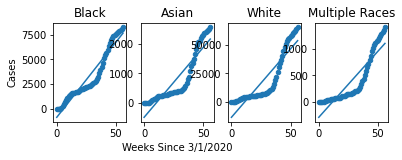

In [ ]:
#Scatter plots for number of cases since March 1, 2020 by race in RI
%matplotlib inline

fig = plt.figure()
ax = fig.add_subplot(2,4,1)
df_Race_rates.plot(kind='scatter', x='Weeks Since 3/1/2020', y='Black or African American', ax=ax)
plt.xlabel('')
plt.ylabel('Cases')
plt.title('Black')
m1, b1 = np.polyfit(df_Race_rates['Weeks Since 3/1/2020'], df_Race_rates['Black or African American'], 1)
plt.plot(df_Race_rates['Weeks Since 3/1/2020'], (m1*df_Race_rates['Weeks Since 3/1/2020'] + b1))

ax = fig.add_subplot(2,4,2)
df_Race_rates.plot(kind='scatter', x='Weeks Since 3/1/2020', y='Asian', ax=ax)
plt.xlabel('Weeks Since 3/1/2020')
plt.ylabel('')
plt.title('Asian')
m2, b2 = np.polyfit(df_Race_rates['Weeks Since 3/1/2020'], df_Race_rates['Asian'], 1)
plt.plot(df_Race_rates['Weeks Since 3/1/2020'], m2*df_Race_rates['Weeks Since 3/1/2020'] + b2)

ax = fig.add_subplot(2,4,3)
df_Race_rates.plot(kind='scatter', x='Weeks Since 3/1/2020', y='White', ax=ax)
plt.xlabel('')
plt.ylabel('')
plt.title('White')
m3, b3 = np.polyfit(df_Race_rates['Weeks Since 3/1/2020'], df_Race_rates['White'], 1)
plt.plot(df_Race_rates['Weeks Since 3/1/2020'], m3*df_Race_rates['Weeks Since 3/1/2020'] + b3)


ax = fig.add_subplot(2,4,4)
df_Race_rates.plot(kind='scatter', x='Weeks Since 3/1/2020', y='Multiple Races', ax=ax)
plt.xlabel('')
plt.ylabel('')
plt.title('Multiple Races')
m4, b4 = np.polyfit(df_Race_rates['Weeks Since 3/1/2020'], df_Race_rates['Multiple Races'], 1)
plt.plot(df_Race_rates['Weeks Since 3/1/2020'], m4*df_Race_rates['Weeks Since 3/1/2020'] + b4)

plt.show()

This next cell will ask for an input for the number of weeks since 3/1/2020. It will then output the expected number of cases by race (Black/African American, Asian, White, Multiple Races) based on the equations for the line of best fit.

In [ ]:
#Create functions based on linear regression
m1=int(b1)
b1=int(b1)
print('Enter a positive value for x (Weeks Since 3/1/2020):')
x = input()
x=int(x)


def Black_Rates(x, m1, b1):
  y=m1*x+b1
  return(y)


def Asian_Rates(x, m2, b2):
  y=m2*x+b2
  return(y)


def White_Rates(x, m3, b3):
  y=m3*x+b3
  return(y)


def Mult_Rates(x, m4, b4):
  y=m4*x+b4
  return(y)

b=Black_Rates(x, m1, b1)
a=Asian_Rates(x, m2, b2)
w=White_Rates(x, m3, b3)
m=Mult_Rates(x, m4, b4)

print(b,a,w,m)


Enter a positive value for x (Weeks Since 3/1/2020):
4
-4290 -289.42157116930275 -8696.651369803823 -190.73338518710568


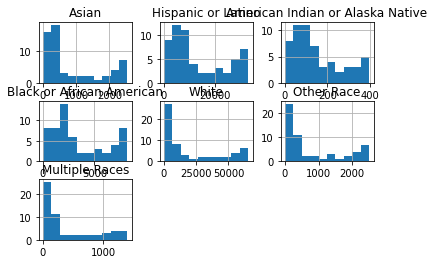

In [ ]:
df_Race_rates_hist=df_Race_rates.drop(columns=['Weeks Since 3/1/2020'])

#create histogram of total cumulative cases by race since 3/1/2020 in RI
df_Race_rates_hist.hist()

plt.show()

This next cell reads in data which describes the number of covid cases each week in each town/city in RI.

In [ ]:
#Read in dataset Rhode Island Demographics
Download_Data4= drive.CreateFile({'id':'1a87E9gsZqLSa1pBEEBrlUsKtGUS5sTs1'})
Download_Data4.GetContentFile('COVID-19 Rhode Island Data - Municipal Rate Trends.csv')
RI_Data_Municipality_Rates=pd.read_csv('COVID-19 Rhode Island Data - Municipal Rate Trends.csv', skiprows=7, skip_blank_lines='true')


#Remove row with total population
RI_Data_Municipality_Rates.drop([0])


#Replace asteriks with 0
mydf1=RI_Data_Municipality_Rates.replace('*', 0)
mydf1=mydf1.replace(',', '')
mydf1=mydf1.drop([0])
mydf1.head()

#changed string to int to calculate cumsum
Barrington=np.cumsum(mydf1['BARRINGTON'].to_numpy(dtype=np.float32))
Bristol=np.cumsum(mydf1['BRISTOL'].to_numpy(dtype=np.float32))
Burrillville=np.cumsum(mydf1['BURRILLVILLE'].to_numpy(dtype=np.float32))
Central_falls=np.cumsum(mydf1['CENTRAL FALLS'].to_numpy(dtype=np.float32))
Charlestown=np.cumsum(mydf1['CHARLESTOWN'].to_numpy(dtype=np.float32))
Coventry=np.cumsum(mydf1['COVENTRY'].to_numpy(dtype=np.float32))
Cranston=np.cumsum(mydf1['CRANSTON'].to_numpy(dtype=np.float32))
Cumberland=np.cumsum(mydf1['CUMBERLAND'].to_numpy(dtype=np.float32))
East_Greenwich=np.cumsum(mydf1['EAST GREENWICH'].to_numpy(dtype=np.float32))
East_Providence=np.cumsum(mydf1['EAST PROVIDENCE'].to_numpy(dtype=np.float32))
Exeter=np.cumsum(mydf1['EXETER'].to_numpy(dtype=np.float32))
Foster=np.cumsum(mydf1['FOSTER'].to_numpy(dtype=np.float32))
Glocester=np.cumsum(mydf1['GLOCESTER'].to_numpy(dtype=np.float32))
Hopkinton=np.cumsum(mydf1['HOPKINTON'].to_numpy(dtype=np.float32))
Jamestown=np.cumsum(mydf1['JAMESTOWN'].to_numpy(dtype=np.float32))
Johnston=np.cumsum(mydf1['JOHNSTON'].to_numpy(dtype=np.float32))
Lincoln=np.cumsum(mydf1['LINCOLN'].to_numpy(dtype=np.float32))
Little_Compton=np.cumsum(mydf1['LITTLE COMPTON'].to_numpy(dtype=np.float32))
Middletown=np.cumsum(mydf1['MIDDLETOWN'].to_numpy(dtype=np.float32))
Narragansett=np.cumsum(mydf1['NARRAGANSETT'].to_numpy(dtype=np.float32))
New_Shoreham=np.cumsum(mydf1['NEW SHOREHAM'].to_numpy(dtype=np.float32))
Newport=np.cumsum(mydf1['NEWPORT'].to_numpy(dtype=np.float32))
North_Kingstown=np.cumsum(mydf1['NORTH KINGSTOWN'].to_numpy(dtype=np.float32))
North_Providence=np.cumsum(mydf1['NORTH PROVIDENCE'].to_numpy(dtype=np.float32))
North_Smithfield=np.cumsum(mydf1['NORTH SMITHFIELD'].to_numpy(dtype=np.float32))
Pawtucket=np.cumsum(mydf1['PAWTUCKET'].to_numpy(dtype=np.float32))
Portsmouth=np.cumsum(mydf1['PORTSMOUTH'].to_numpy(dtype=np.float32))
Providence=np.cumsum(mydf1['PROVIDENCE'].to_numpy(dtype=np.float32))
Richmond=np.cumsum(mydf1['RICHMOND'].to_numpy(dtype=np.float32))
Scituate=np.cumsum(mydf1['SCITUATE'].to_numpy(dtype=np.float32))
Smithfield=np.cumsum(mydf1['SMITHFIELD'].to_numpy(dtype=np.float32))
South_Kingstown=np.cumsum(mydf1['SOUTH KINGSTOWN'].to_numpy(dtype=np.float32))
Tiverton=np.cumsum(mydf1['TIVERTON'].to_numpy(dtype=np.float32))
Warren=np.cumsum(mydf1['WARREN'].to_numpy(dtype=np.float32))
Warwick=np.cumsum(mydf1['WARWICK'].to_numpy(dtype=np.float32))
West_Greenwich=np.cumsum(mydf1['WEST GREENWICH'].to_numpy(dtype=np.float32))
West_Warwick=np.cumsum(mydf1['WEST WARWICK'].to_numpy(dtype=np.float32))
Westerly=np.cumsum(mydf1['WESTERLY'].to_numpy(dtype=np.float32))
Woonsocket=np.cumsum(mydf1['WOONSOCKET'].to_numpy(dtype=np.float32))

#made a dataframe with cumulative covid cases in each town every week since 3/1/2020
Town_rates={'Barrington':Barrington, 'Bristol': Bristol, 'Burrillville': Burrillville, 'Central Falls':Central_falls, 'Charlestown':Charlestown, 'Coventry': Coventry, 'Cranston':Cranston, 'Cumberland':Cumberland, 'East Greenwich':East_Greenwich, 'East Providence':East_Providence, 'Exeter':Exeter, 'Foster':Foster, 'Glocester':Glocester, 'Hopkinton':Hopkinton, 'Jamestown':Jamestown, 'Johnston':Johnston, 'Lincoln':Lincoln, 'Little Compton':Little_Compton, 'Middletown':Middletown, 'Narragansett':Narragansett, 'New Shoreham':New_Shoreham, 'Newport':Newport, 'North Kingstown':North_Kingstown, 'North Providence':North_Providence, 'North Smithfield':North_Smithfield, 'Pawtucket':Pawtucket, 'Portsmouth':Portsmouth, 'Providence':Providence, 'Richmond':Richmond, 'Scituate':Scituate, 'Smithfield':Smithfield, 'South Kingstown':South_Kingstown, 'Tiverton':Tiverton, 'Warren':Warren, 'Warwick':Warwick, 'West Greenwich':West_Greenwich, 'West Warwick':West_Warwick, 'Westerly':Westerly,'Woonsocket':Woonsocket}
df_Town_rates = pd.DataFrame(Town_rates)


Running this next cell will output two scatter plots. The first plot shows the per capita income for every town and the second shows total covid cases for every town.

In [ ]:
#Read in dataframe for RI Per Capita Income
Download_Data5= drive.CreateFile({'id':'1J0hidUHUx-zrwhzxWzS9LVqvJ5XCAg9L'})
Download_Data5.GetContentFile('RI_Towns_Income.xlsx')
RI_Income=pd.read_excel('RI_Towns_Income.xlsx')
RI_Income

#Add income data to covid data by town
df_Town_rates_t=df_Town_rates.T
Income=RI_Income['Per Capita Income'].to_list()
df_Town_rates_t.insert(0, "Per Capita Income", Income)
df_Town_rates_t.insert(0, "City/Towns", df_Town_rates_t.index)
df_Town_rates_t.insert(0, "Total Cases", df_Town_rates_t[df_Town_rates_t.columns[-1]].values)


#Rename the index
df_Town_rates_t=df_Town_rates_t.rename_axis('City/Towns')


Totals=df_Town_rates_t[df_Town_rates_t.columns[-1]].replace('\n','',regex=True)


#Correlation plot

df_Town_rates_t.plot(kind='scatter',x='City/Towns', y='Per Capita Income', rot=90)

df_Town_rates_t.plot(kind='scatter',x='City/Towns', y='Total Cases', rot=90)



This next cell runs a one-way Anova and Multicomparison test to determine if there is a significant difference in the number of COVID cases by race in RI.

       Asian  Black or African American        White  Multiple Races
1  44.614037                 144.070175  1147.736816       24.561403
F statistic = 40.598 and probability p = 0.000
<class 'pandas.core.series.Series'>
                      Multiple Comparison of Means - Tukey HSD, FWER=0.05                      
          group1                    group2           meandiff p-adj    lower     upper   reject
-----------------------------------------------------------------------------------------------
                    Asian Black or African American   99.4561 0.8205 -211.2876  410.1999  False
                    Asian            Multiple Races  -20.0526    0.9 -330.7963  290.6911  False
                    Asian                     White 1103.1228  0.001  792.3791 1413.8665   True
Black or African American            Multiple Races -119.5088 0.7269 -430.2525  191.2349  False
Black or African American                     White 1003.6667  0.001   692.923 1314.4104   True
           

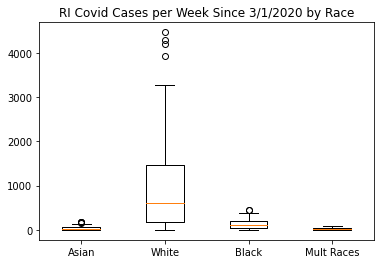

In [ ]:
from statsmodels.stats.multicomp import (pairwise_tukeyhsd, MultiComparison)

#Find average number of cases by race
Asian_av=[np.mean(mydf['Asian'].to_numpy(dtype=np.float32))]
Black_av=[np.mean(mydf['Black or African American'].to_numpy(dtype=np.float32))]
Mult_av=[np.mean(mydf['Multiple race'].to_numpy(dtype=np.float32))]
White_av=[np.mean(mydf['White'].to_numpy(dtype=np.float32))]

#Create new dataset with average number of cases per week since March 1, 2020
Race_av={'Asian':Asian_av, 'Black or African American':Black_av, 'White':White_av, 'Multiple Races':Mult_av}
df_Race_av = pd.DataFrame(Race_av, index=[1])
print(df_Race_av)

Asian1=mydf['Asian'].to_numpy(dtype=np.float32)
White1=mydf['White'].to_numpy(dtype=np.float32)
Black1=mydf['Black or African American'].to_numpy(dtype=np.float32)
Mult1=mydf['Multiple race'].to_numpy(dtype=np.float32)

myindex=['Week {}'.format(k) for k in range (57)]
Race={'Index':myindex, 'Asian':Asian1, 'White':White1, 'Black or African American':Black1, 'Multiple Races':Mult1}
df_Race=pd.DataFrame(Race).set_index('Index')


#ANOVA to determine if there is a statistical difference between the number of cases each week since 3/1/2020 by race in RI
F,p=scipy.stats.f_oneway(White1, Black1, Mult1, Asian1)
print('F statistic = {:5.3f} and probability p = {:5.3f}'.format(F, p)) 

#convert dataframe to two columns
stacked_data = df_Race.stack().reset_index() 
stacked_data = stacked_data.rename(columns={'level_0': 'id', 'level_1': 'treatment', 0:'result'})
print(type(stacked_data['result']))
MultiComp = MultiComparison(stacked_data['result'].to_numpy(dtype=np.float64), stacked_data['treatment'])
print(MultiComp.tukeyhsd().summary())


#Create boxplot for COVID cases by race
Asian3=pd.to_numeric(df_Race['Asian'])
White3=pd.to_numeric(df_Race['White'])
Black3=pd.to_numeric(df_Race['Black or African American'])
Mult3=pd.to_numeric(df_Race['Multiple Races'])

#White3=df_Race['White'].to_numeric()
#Black3=df_Race['Black or African American'].to_numeric()
#Mult3=df_Race['Multiple Races'].to_numeric()


plt.boxplot([Asian1, White1, Black1, Mult1])
x=[1, 2, 3, 4]
labels=['Asian', 'White', 'Black', 'Mult Races']
plt.xticks(x, labels)
plt.title('RI Covid Cases per Week Since 3/1/2020 by Race')

plt.show()


After running a one-way Anova, there is sufficient evidence to conclude that there are significant differences in the number of covid cases in RI since 3/1/2020 by race. Further tests indicate that there are significant differences between Asian and White groups, Black or African American and White groups, and Multiple Races and White groups. This suggests individuals identifying as white were more likely to contract covid. However, further tests would be needed to look at the distribution based on demographics.

Demographics of RI: White: 80.46% Black or African American: 6.77% Other race: 5.47% Asian: 3.40% Two or more races: 3.33% Native American: 0.50% Native Hawaiian or Pacific Islander: 0.08%

This next cell codes for a one-way Anova and multicomparison test to look at the effects of race on covid cases; however, it corrects for the percent make-up of each race in the population.

                     Multiple Comparison of Means - Tukey HSD, FWER=0.05                     
          group1                    group2          meandiff p-adj   lower     upper   reject
---------------------------------------------------------------------------------------------
                    Asian Black or African American   8.2367   0.9 -240.5223  256.9957  False
                    Asian            Multiple Races   -0.699   0.9  -249.458    248.06  False
                    Asian                     White 921.9522 0.001  673.1932 1170.7112   True
Black or African American            Multiple Races  -8.9357   0.9 -257.6946  239.8233  False
Black or African American                     White 913.7155 0.001  664.9565 1162.4745   True
           Multiple Races                     White 922.6512 0.001  673.8922 1171.4101   True
---------------------------------------------------------------------------------------------
F statistic = 40.598 and probability p = 0.000


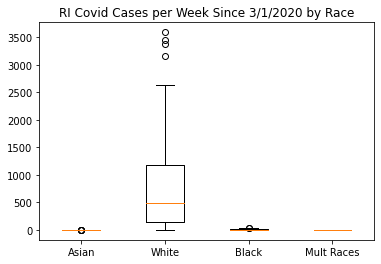

In [ ]:
#Create new dataset with average number of cases per week since March 1, 2020 by population demographics
myindex1=['Week {}'.format(k) for k in range (57)]
from statsmodels.stats.multicomp import (pairwise_tukeyhsd, MultiComparison)

#multiply each variable by Rhode Island Demographics (based on American Community Survey)
Asian2=mydf['Asian'].to_numpy(dtype=np.float64)*.034
White2=mydf['White'].to_numpy(dtype=np.float64)*.8046
Black2=mydf['Black or African American'].to_numpy(dtype=np.float64)*.0677
Mult2=mydf['Multiple race'].to_numpy(dtype=np.float64)*.0333


Race1={'Index':myindex1, 'Asian':Asian2, 'White':White2, 'Black or African American':Black2, 'Multiple Races':Mult2}
df_Race_demo=pd.DataFrame(Race1).set_index('Index')

#convert dataframe to two columns
stacked_data1 = df_Race_demo.stack().reset_index() 
stacked_data1 = stacked_data1.rename(columns={'level_0': 'id', 'level_1': 'treatment', 0:'result'})
#print(type(stacked_data['result']))
MultiComp1 = MultiComparison(stacked_data1['result'].to_numpy(dtype=np.float64), stacked_data1['treatment'])
print(MultiComp1.tukeyhsd().summary())


#ANOVA to determine if there is a statistical difference between the number of cases each week since 3/1/2020 by race in RI
F,p=scipy.stats.f_oneway(White1, Black1, Mult1, Asian1)
#F,p=scipy.stats.f_oneway(White, Black_or_African_American, Multiple_race, Asian)
print('F statistic = {:5.3f} and probability p = {:5.3f}'.format(F, p)) 



plt.boxplot([Asian2, White2, Black2, Mult2])
x=[1, 2, 3, 4]
labels=['Asian', 'White', 'Black', 'Mult Races']
plt.xticks(x, labels)
plt.title('RI Covid Cases per Week Since 3/1/2020 by Race')

plt.show()

After running a one-way Anova, there is sufficient evidence to conclude that there are significant differences in the number of covid cases in RI since 3/1/2020 by race (corrected for % of population). Further tests indicate that there are significant differences between Asian and White groups, Black or African American and White groups, and Multiple Races and White groups. This suggests individuals identifying as white were more likely to contract covid. However, further tests would be needed to look at the distribution based on demographics.

# **Pennsylvania Age Data**

Now, let's take a look at Pennsyvlania! Pennsylvania has really robust vaccination data, so we are able to look at vaccinations on a county by county level. Below, we generated graphs comparing age and vaccination rates in Pennsyvlvania's four largest counties. Two of these counties (Montgomery and Bucks) are disproportionately wealthy and suburban, while the other two counties (Philadelphia and Allegheny) are more urban and less wealthy.

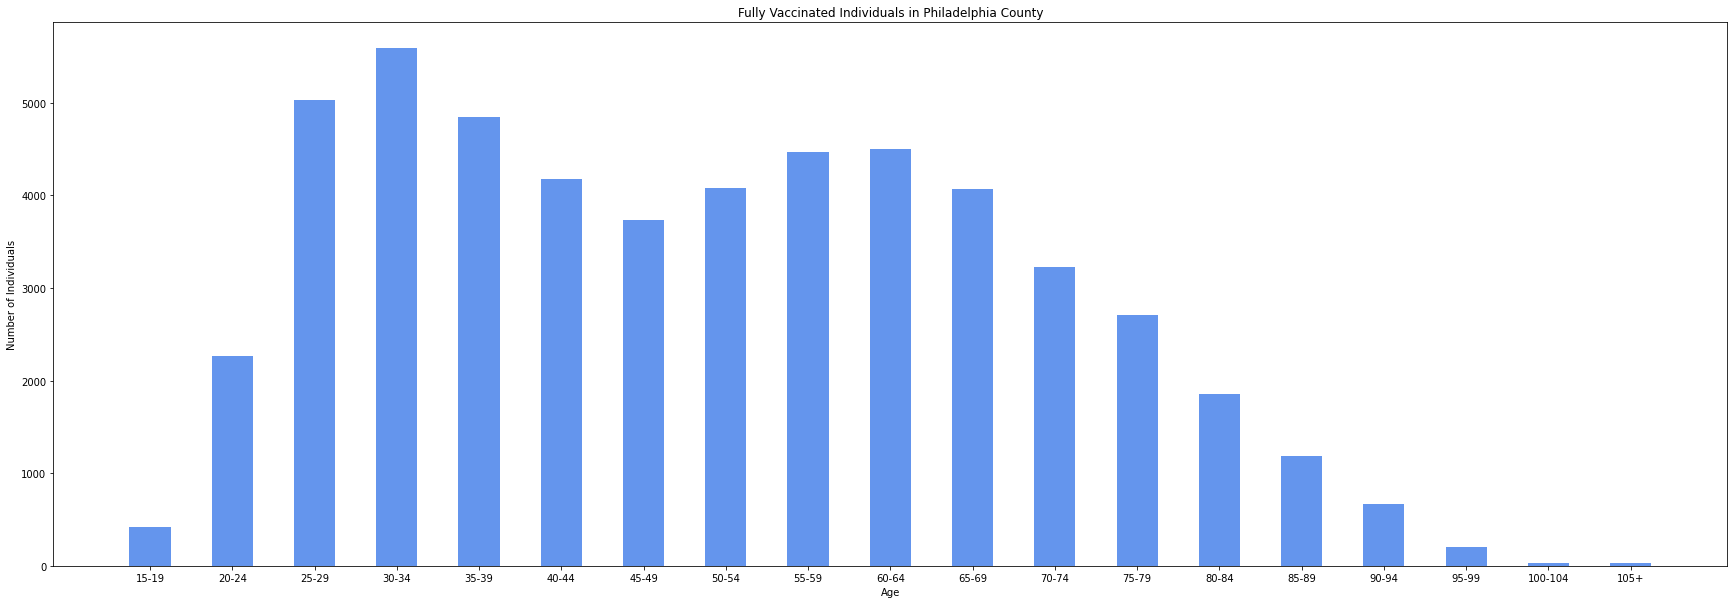

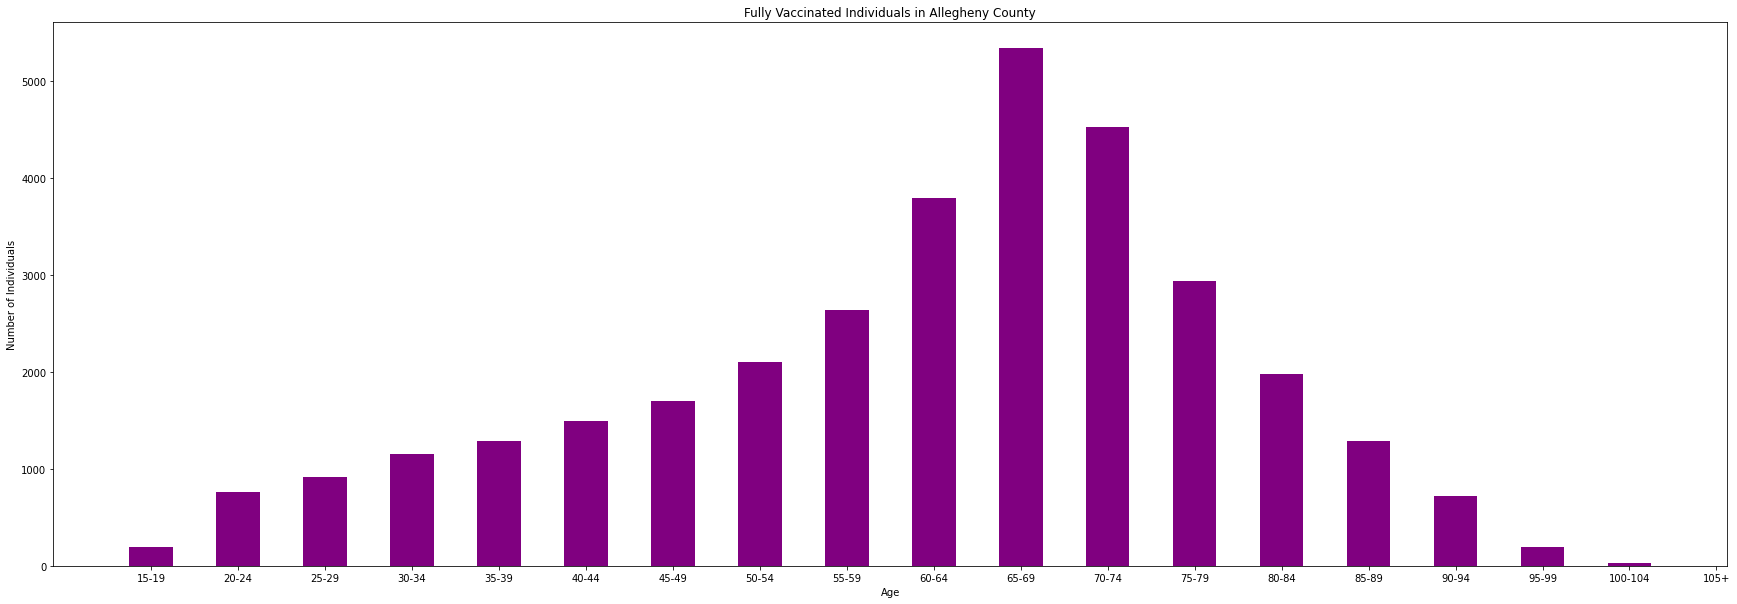

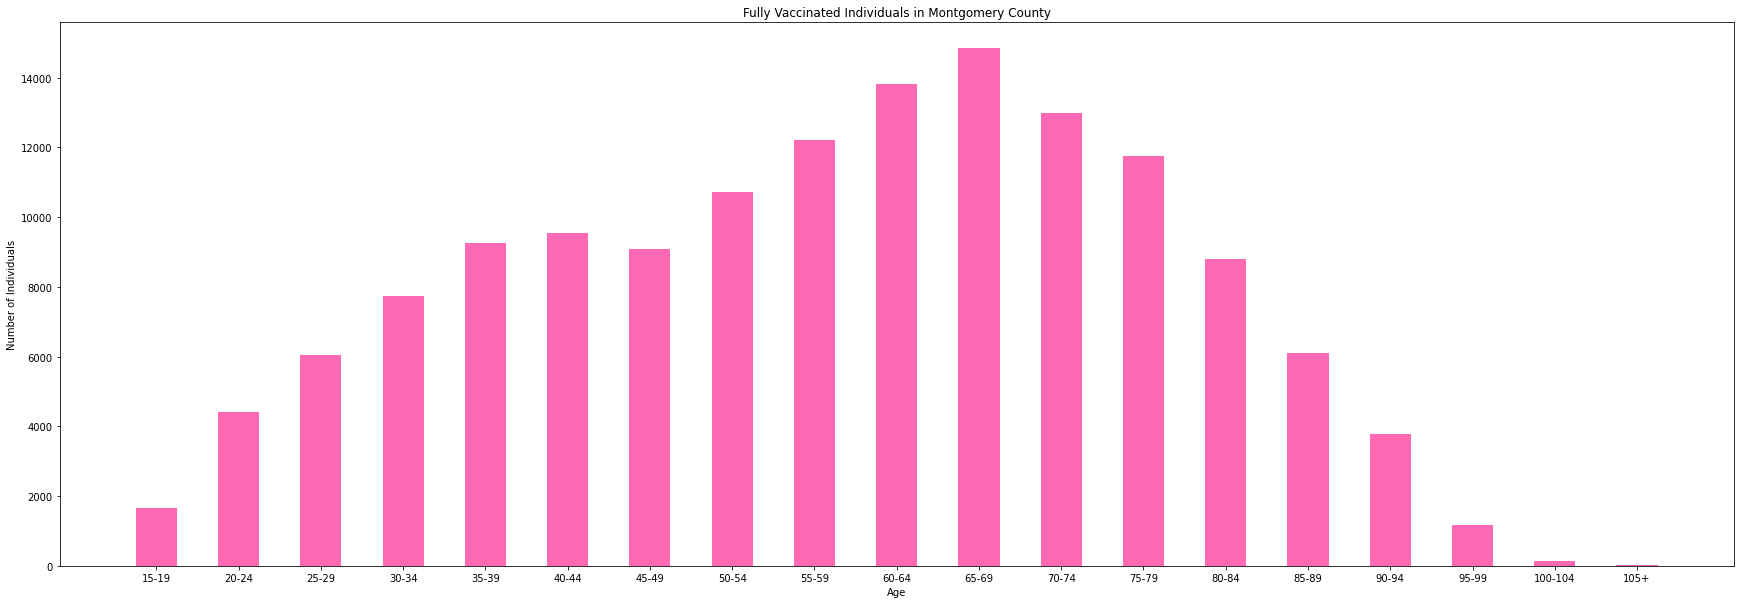

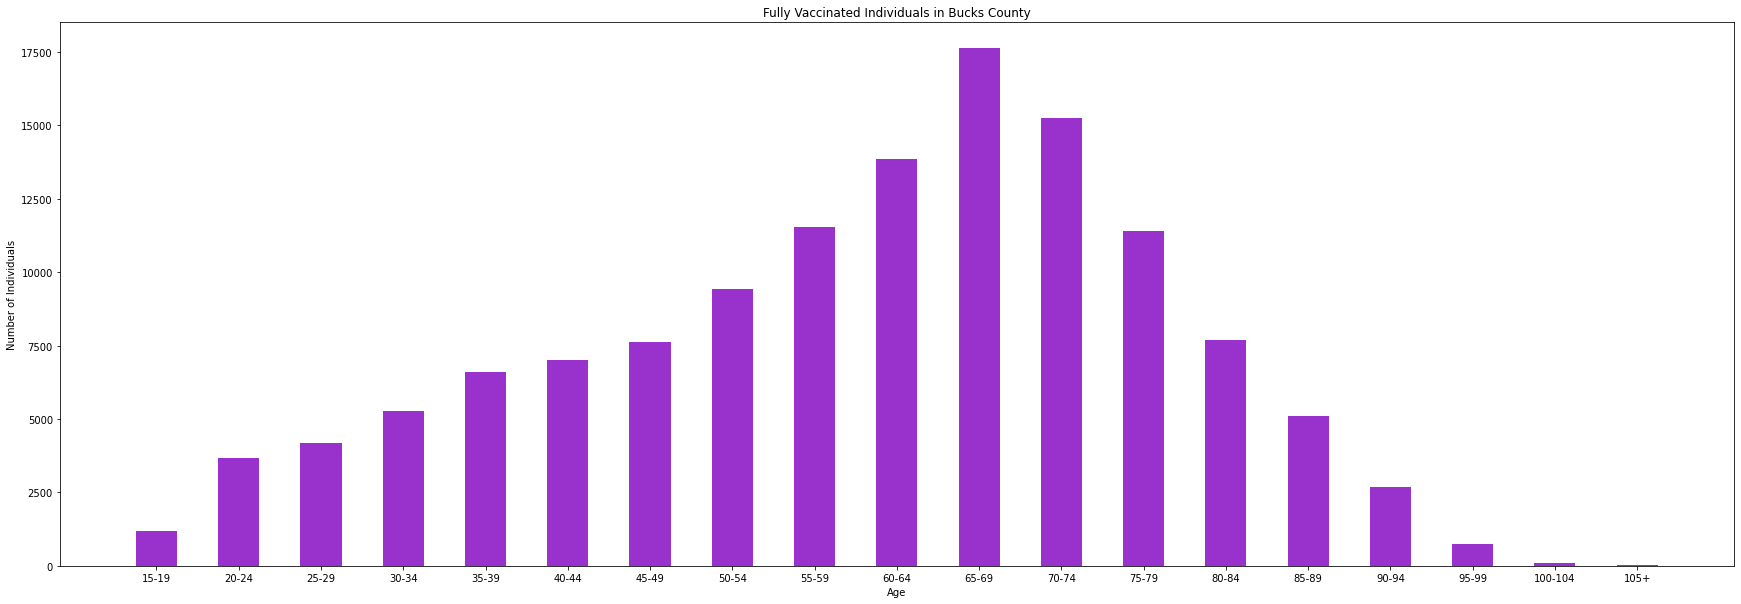

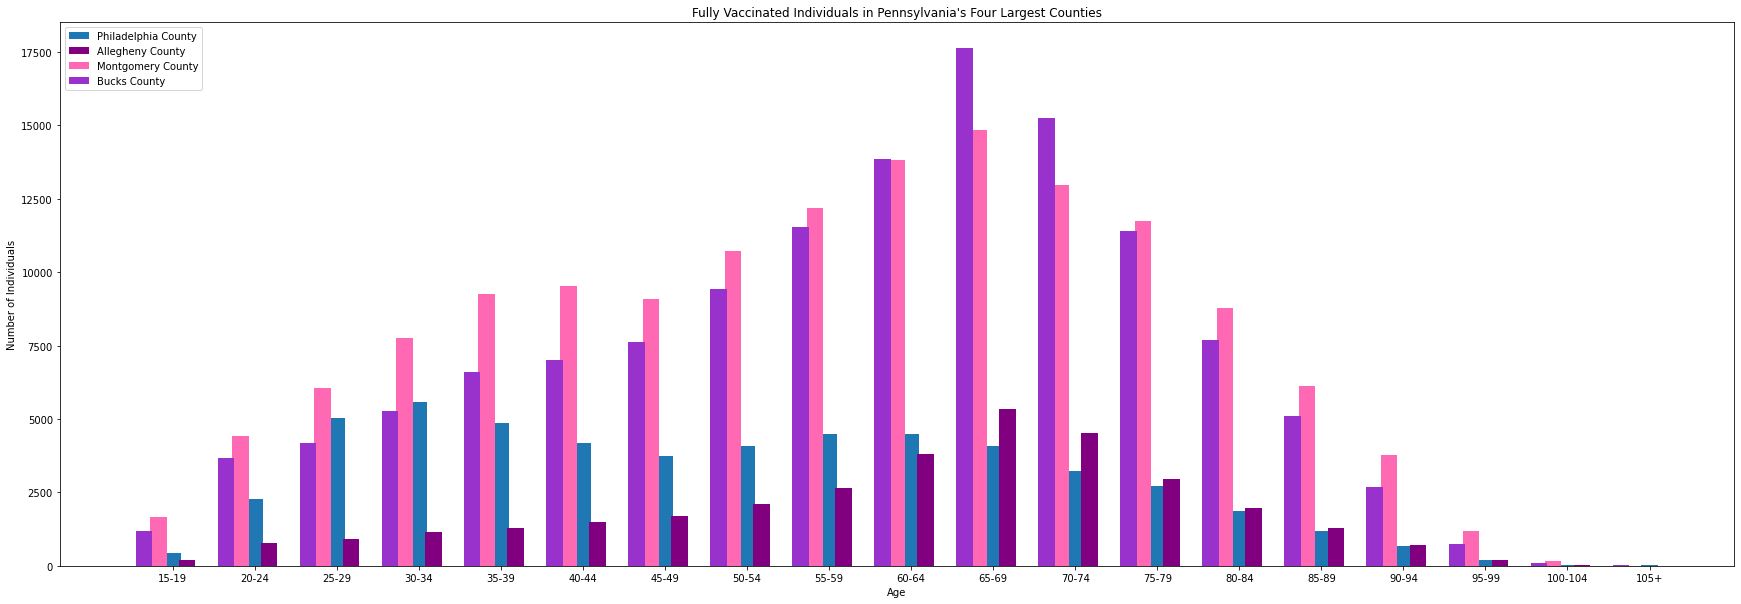

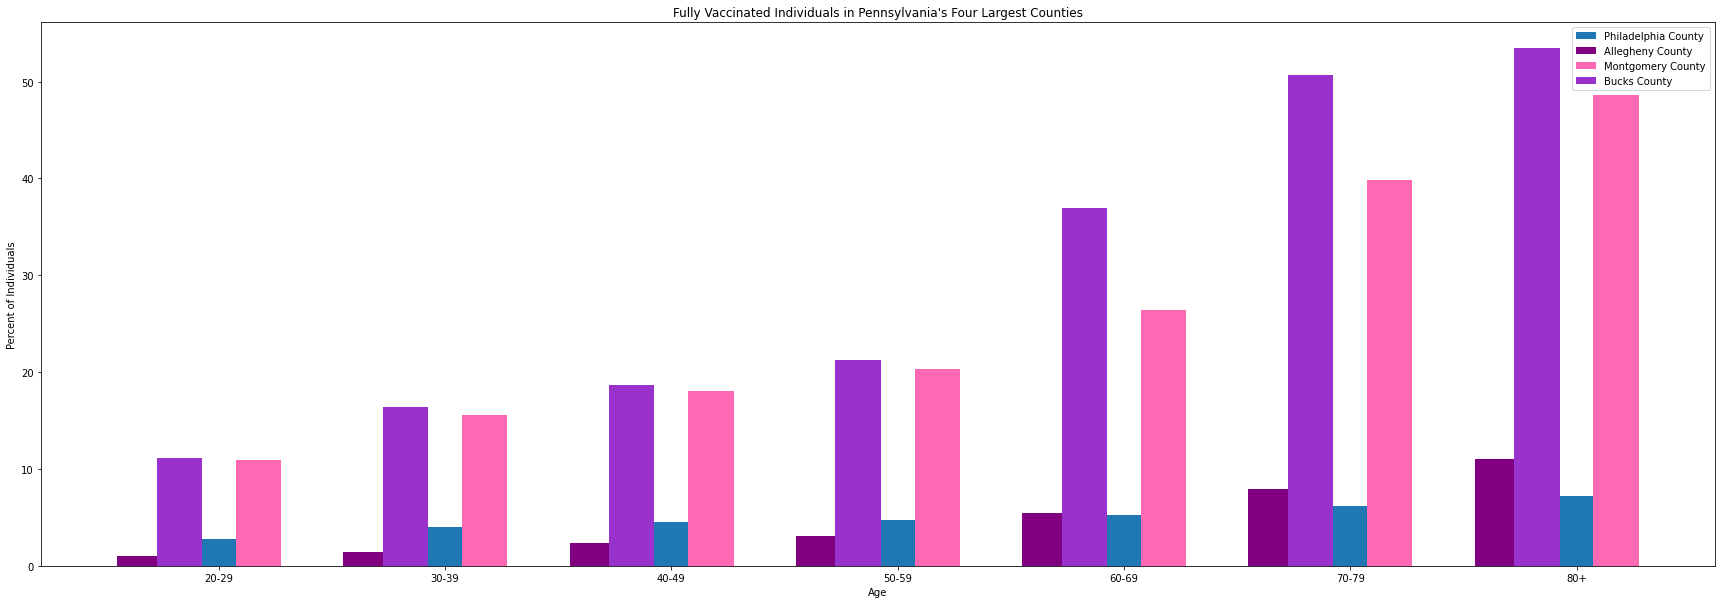

In [ ]:
##make sure to run the import block at the top of this project before running the below code!!

pennvax = 'https://raw.githubusercontent.com/desmondg19/CLPSProject2/main/pavaccine.csv' ##importing datasets for pennsyvlania vaccination rates
dataset1 = pd.read_csv(pennvax)
phillyvax = 'https://raw.githubusercontent.com/desmondg19/CLPSProject2/main/4%20most%20populous%20counties.csv'
dataset2 = pd.read_csv(phillyvax)


#Philadelphia County Graph 
X = list(dataset2.iloc[:, 0]) ##identifying the x axis in our data
Y = list(dataset2.iloc[:, 1]) ##identifying the y axis in our data 
plt.subplots(1,1,figsize=(30,10))
plt.bar(X,Y,  width =.5, color = 'cornflowerblue') ##generating our bar graph and assigning a specific color and width 
plt.title("Fully Vaccinated Individuals in Philadelphia County")
plt.xlabel("Age")
plt.ylabel("Number of Individuals")

#Allegheny County Graph
Z = list(dataset2.iloc[:, 8])
plt.subplots(1,1,figsize=(30,10))
plt.bar(X,Z,  width =.5, color = 'purple')
plt.title("Fully Vaccinated Individuals in Allegheny County")
plt.xlabel("Age")
plt.ylabel("Number of Individuals")

#Montgomery County Graph
A = list(dataset2.iloc[:, 9])
plt.subplots(1,1,figsize=(30,10))
plt.bar(X,A, width =.5, color = 'hotpink')
plt.title("Fully Vaccinated Individuals in Montgomery County")
plt.xlabel("Age")
plt.ylabel("Number of Individuals")

#Bucks County Graph
B = list(dataset2.iloc[:, 10])
plt.subplots(1,1,figsize=(30,10))
plt.bar(X,B,  width =.5, color = 'darkorchid')
plt.title("Fully Vaccinated Individuals in Bucks County")
plt.xlabel("Age")
plt.ylabel("Number of Individuals")

##comparing all 4 counties for total amount of vaccinations
q = np.arange(len(X)) ##setting the length of the x axis
width = .35
fig, ax = plt.subplots(1,1,figsize=(30,10))
rects1 = ax.bar(X, Y, .2, label='Philadelphia County') ##ensuring the X axis labels remain ages
rects2 = ax.bar(q+width/2, Z, .2, label='Allegheny County', color = 'purple')
rects3 = ax.bar(q-width/2, A, .2, label='Montgomery County', color = 'hotpink')
rects4 = ax.bar(q-width, B, .2, label='Bucks County', color = 'darkorchid')
plt.title("Fully Vaccinated Individuals in Pennsylvania's Four Largest Counties")
plt.xlabel("Age")
plt.ylabel("Number of Individuals")
plt.legend() ##displaying the graph legend 

##comparing the counties percentage-wise
percentagevax = 'https://raw.githubusercontent.com/desmondg19/CLPSProject2/main/papercentages.csv'
dataset4 = pd.read_csv(percentagevax) ##importing a new data set where everything is quantified by percentages as opposed to raw numbers
C = list(dataset4.iloc[:,0]) ##identifying each county's vaccination rates by age 
D = list(dataset4.iloc[:,3])
E = list(dataset4.iloc[:,6])
F = list(dataset4.iloc[:,9])
G = list(dataset4.iloc[:,12])
         
q = np.arange(len(C))
width = .35
fig, ax = plt.subplots(1,1,figsize=(30,10))
rects5 = ax.bar(C, D, .2, label='Philadelphia County')
rects6 = ax.bar(q-width, E, .2, label='Allegheny County', color = 'purple')
rects7 = ax.bar(q+width/2, F, .2, label='Montgomery County', color = 'hotpink')
rects8 = ax.bar(q-width/2, G, .2, label='Bucks County', color = 'darkorchid')
plt.title("Fully Vaccinated Individuals in Pennsylvania's Four Largest Counties")
plt.xlabel("Age")
plt.ylabel("Percent of Individuals")
plt.legend()
         

So what does the above data tell us? First, we can see that although a larger amount of middle aged individuals are being vaccinated, percentage-wise, older indivisuals are being vaccinated at a higher rate.

Additionally, we can see some very real inequities in vaccinations accross Pennsylvania. From this data, it appears that a higher percentage of individuals in the wealthier counties (Montgomery and Bucks) are vaccinated compared to the less wealthy counties (Philadelphia and Allegheny).

Now, let's look at how Pennsylvania is vaccinating accross the entire state!

Text(0, 0.5, 'Percent of Population')

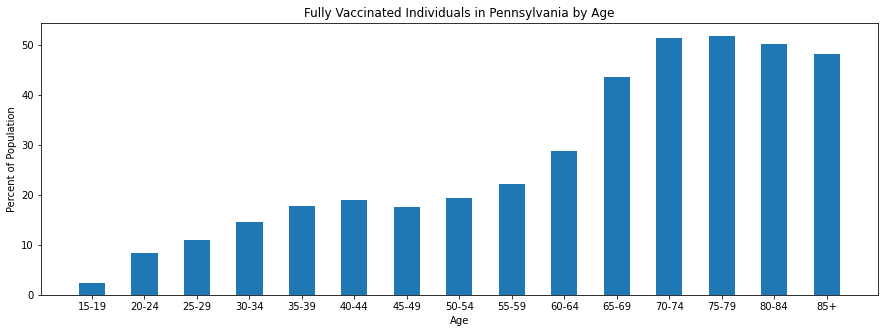

In [ ]:
##generating a graph for state wide vaccination trends
newpennvax = 'https://raw.githubusercontent.com/desmondg19/CLPSProject2/main/PA%20Vax%20Data%20Updated%20-%20Sheet1.csv'
dataset3 = pd.read_csv(newpennvax)
X = list(dataset3.iloc[:,0])
Y = list(dataset3.iloc[:,7])
plt.figure(figsize = (15,5))
plt.bar(X,Y, width = .5)
plt.title("Fully Vaccinated Individuals in Pennsylvania by Age")
plt.xlabel("Age")
plt.ylabel("Percent of Population")

As shown above, the percentages per age group look much closer to the data from Bucks and Montgomery counties than the data from Philadelphia and Allegheny counties. This is one of the problems with using data from such large populations for analysis! Pennsylvania seems to be doing relatively well according to this one graph, but when we look at a closer level, we can see disparities. 

Now, let's look at Rhode Island!

Text(0, 0.5, 'Percent of Population')

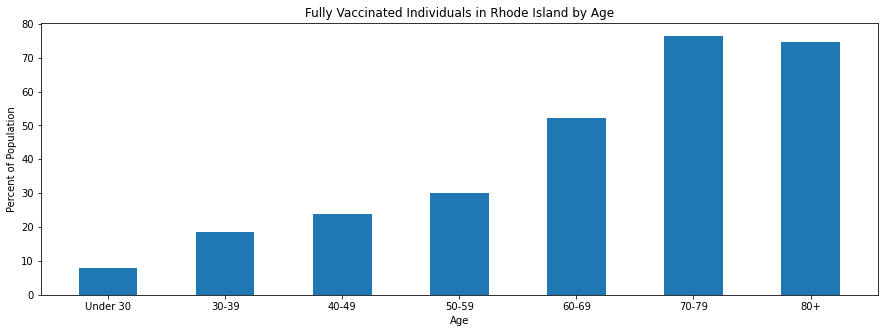

In [ ]:
##generating a graph for statewide vaccination trends in Rhode Island
rivax = 'https://raw.githubusercontent.com/desmondg19/CLPSProject2/main/RI%20Vax%20Data%20-%20Sheet1.csv'##importing Rhode Island Data
dataset5 = pd.read_csv(rivax)
X = list(dataset5.iloc[:,0])
Y = list(dataset5.iloc[:,1])
plt.figure(figsize = (15,5))
plt.bar(X,Y, width =0.5)
plt.title("Fully Vaccinated Individuals in Rhode Island by Age")
plt.xlabel("Age")
plt.ylabel("Percent of Population")

Rhode Island's age-related vaccine data is not as robust as Pennsyvlania's data, so we cannot analyze it on a county by county level in the same way. We can, however, still see some state-wide trends. It appears that like Pennsylvania, Rhode Island is doing a relatively good job on a state-wide level of vaccinating elderly populations ahead of younger individuals. 

Now let's see how both states are doing in comparison to national trends!

Text(0, 0.5, 'Percent Difference')

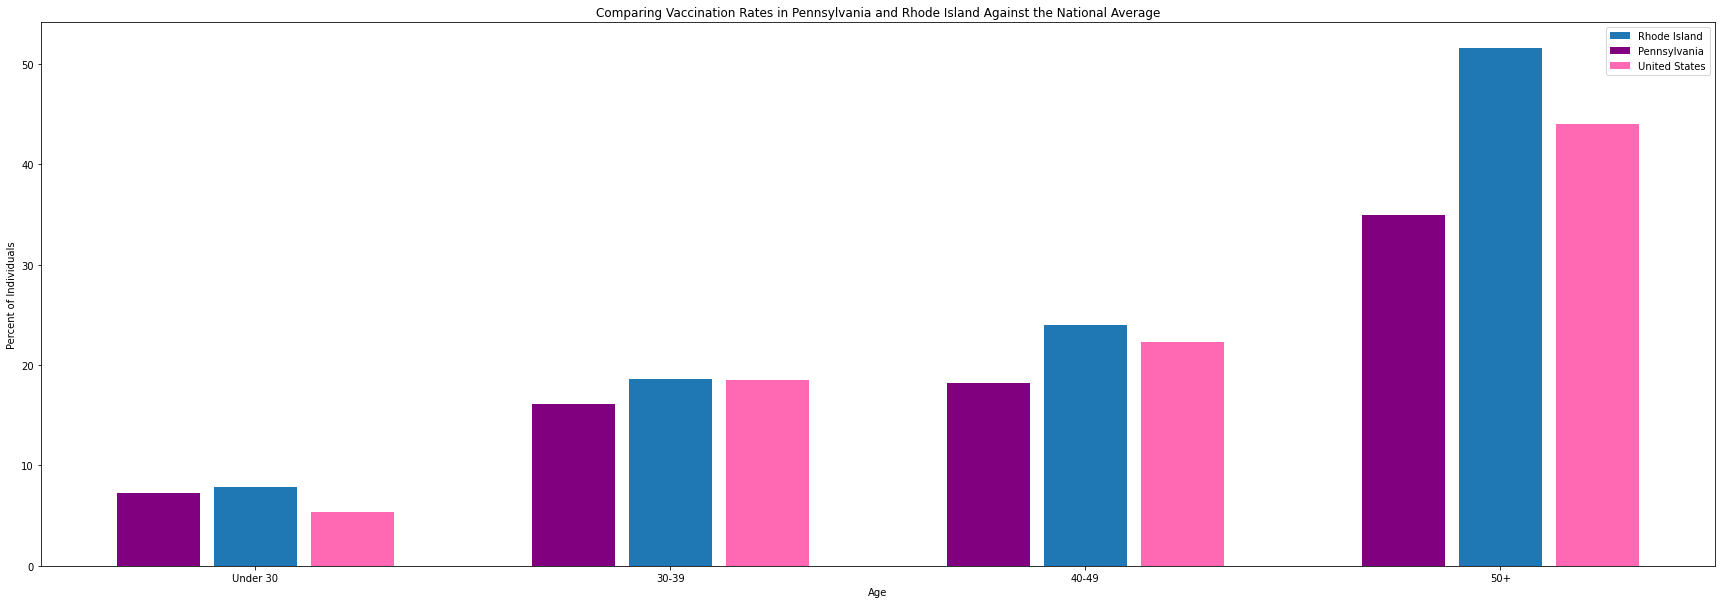

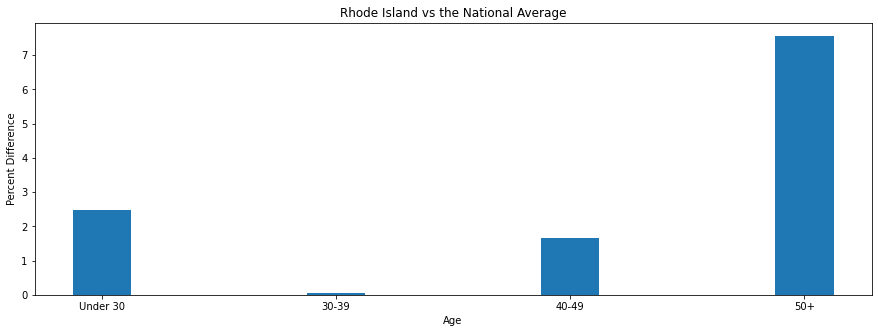

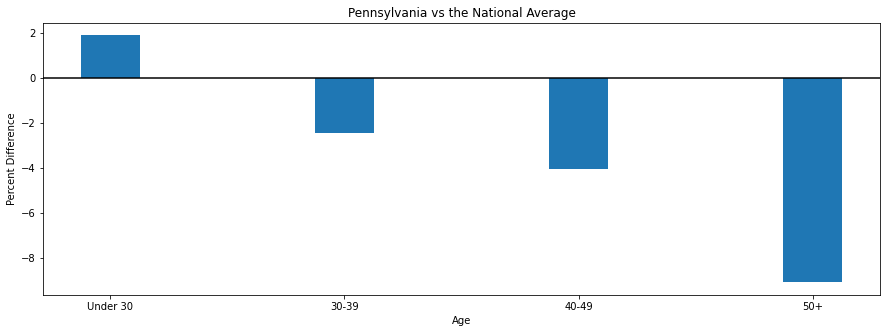

In [ ]:
comparevax = 'https://raw.githubusercontent.com/desmondg19/CLPSProject2/main/Comparative%20Data%20-%20Sheet1.csv' ##importing data that compares Rhode Island, Pennsylvania and National Data together
finaldata = pd.read_csv(comparevax)
X = list(finaldata.iloc[:,0]) ##x axis labels
R = list(finaldata.iloc[:,3]) ##Rhode Island Data
P = list(finaldata.iloc[:,4]) #Pennsylvania Data
U = list(finaldata.iloc[:,7]) ##National Data
RU = list(finaldata.iloc[:,8]) ##Rhode Island minus US Vaccine Rates
PU = list(finaldata.iloc[:,9]) ## Pennsylvania minus US Vaccine rates

##Triple bar graph comparing percent vaccinated by age group in all three categories 
q = np.arange(len(X))
width = .35
fig, ax = plt.subplots(1,1,figsize=(30,10))
rects5 = ax.bar(X, R, .2, label='Rhode Island')
rects6 = ax.bar(q-width/(1.5), P, .2, label='Pennsylvania', color = 'purple')
rects7 = ax.bar(q+width/(1.5), U, .2, label='United States', color = 'hotpink')
plt.title("Comparing Vaccination Rates in Pennsylvania and Rhode Island Against the National Average")
plt.xlabel("Age")
plt.ylabel("Percent of Individuals")
plt.legend()


##Comparing Rhode Island against the National Average
plt.figure(figsize = (15,5))
plt.bar(X,RU, width =0.25)
plt.title("Rhode Island vs the National Average")
plt.xlabel("Age")
plt.ylabel("Percent Difference")

##Comparing Pennsylvania against the National Average
plt.figure(figsize = (15,5))
plt.bar(X,PU, width =0.25)
plt.axhline(y=0, color='black', linestyle='-')
plt.title("Pennsylvania vs the National Average")
plt.xlabel("Age")
plt.ylabel("Percent Difference")

When we compare Rhode Island and Pennsylvania to national trends, what do we see? It appears that Rhode Island is doing a better job at vaccinating individuals in every age group compared to the national average. Pennsylvania, on the other hand, is behind in vaccinations in every age group except individuals under 30, and is especially behind in vaccinating individuals over 50. 

# **COVID Vaccinations by Race**

For this part of the project, we were interested in studying how vaccination rates varied by race both in the US broadly, but most specifically in Pennsylvania because PA had very detailed information about vaccination by various demographic variables, including race. 

In [ ]:
#Importing the necessary Datasets + Description of what is in each data set

#This data set has population information and other demographic data for each county in the US
US_countyinfo = df_sample = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/minoritymajority.csv')
pa_countyinfo = US_countyinfo[US_countyinfo['STNAME'] == 'Pennsylvania']

#This dataset includes the vaccinations by race and by county in PA
pa_racedata = pd.read_csv('https://raw.githubusercontent.com/desmondg19/CLPSProject2/main/COVID-19_Vaccinations_by_Race_Current_County_Health%20(3).csv')
#Note for next line - there is an error in the spelling of one of the pa_racedata column which next line fixes
pa_racedata.rename(columns={'Partially Covered  Unknown': 'Partially Covered Unknown'}, inplace=True)

To start, we generated choropleth maps that show vaccination inequity across the United States. The top graph below shows the ratio of the percentage of white vs Black residents of each state that were vaccinated. The second graph shows similar data for Hispanic residents and the third graph shows that data for Asian residents. The color bar represents the ratios as explained above. 

In [ ]:
#Choropleth for the US
#This dataset has information about each state that was used to generate the maps
state_df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_us_ag_exports.csv')
#This dataset has the values of the vaccination ratios explained above
state_race_data = pd.read_csv('https://raw.githubusercontent.com/desmondg19/CLPSProject2/main/Modified_PercentTotalPopulationReceivedVaccineRace_Ethnicity.csv')

#Merging the two datasets + replacing states without data with zeros
state_df.reset_index(drop=True, inplace=True)
state_race_data.reset_index(drop=True, inplace=True)
state_data_wcodes = pd.merge(state_df[['code', 'state']], state_race_data, left_on='state', right_on = 'Location')
state_data_wcodes['White to Black Ratio'] = state_data_wcodes['White to Black Ratio'].str.replace('NR', '0')
state_data_wcodes['White to Hispanic Ratio'] = state_data_wcodes['White to Hispanic Ratio'].str.replace('NR', '0')
state_data_wcodes['White to Asian Ratio'] = state_data_wcodes['White to Asian Ratio'].str.replace('NR', '0')

#Generating the choropleth graphs
white_to_black_fig = go.Figure(data=go.Choropleth(
    locations=state_data_wcodes['code'],
    z = state_data_wcodes['White to Black Ratio'].astype(float),
    locationmode = 'USA-states',
    colorscale = 'Blues',
    colorbar_title = "Ratio"))
white_to_black_fig.update_layout(
    title_text = 'White to Black Vaccination Ratio',
    geo_scope='usa')
white_to_hispanic_fig = go.Figure(data=go.Choropleth(
    locations=state_data_wcodes['code'],
    z = state_data_wcodes['White to Hispanic Ratio'].astype(float),
    locationmode = 'USA-states',
    colorscale = 'Blues',
    colorbar_title = "Ratio"))
white_to_hispanic_fig.update_layout(
    title_text = 'White to Hispanic Vaccination Ratio',
    geo_scope='usa')
white_to_asians_fig = go.Figure(data=go.Choropleth(
    locations=state_data_wcodes['code'],
    z = state_data_wcodes['White to Asian Ratio'].astype(float),
    locationmode = 'USA-states',
    colorscale = 'Blues',
    colorbar_title = "Ratio"))
white_to_asians_fig.update_layout(
    title_text = 'White to Asian Vaccination Ratio',
    geo_scope='usa')

white_to_black_fig.show()
white_to_hispanic_fig.show()
white_to_asians_fig.show()

PA is one of the most unequal states in the country when it comes to vaccine equity between white and non-white residents. For the ratio of white to Black vaccination rates, PA is the second most unequal state with a ratio of 3.4 (second only to Iowa with a ratio of 3.5). Second, for the ratio of white to Hispanic vaccination rates, PA is tied for first as the highest ratio (along with Georgia), with a ratio of 4.7. And finally, for the ratio of white to Asian vaccination rates, PA is by far the most unequal in vaccination, with a ratio of 20.8. The next highest state is Iowa, with a ratio of 2.4. 

Based on this data, we were interested in learning more about how vaccination varies by race/ethnicity in PA. 

This next set of graphs compares the vaccinations by race for the entire state of PA. The data is plotted as a series of bar charts. The first shows the differences in the percentages of people partially vaccinated by race. The second shows the differences in percentages of people fully vaccinated by race. The last shows the differences in the percentages of people either partially or fully vaccinated by race. 

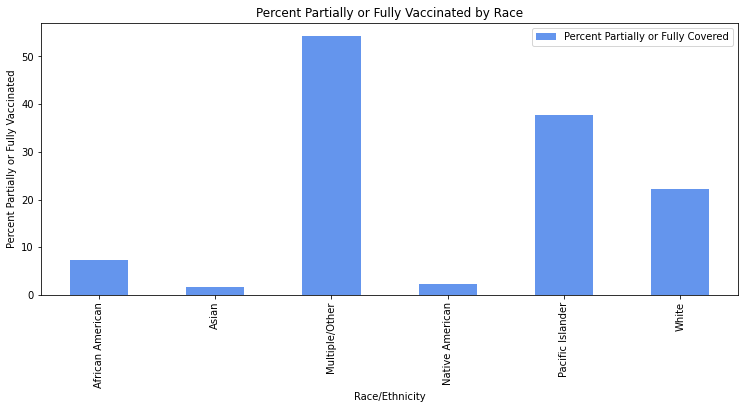

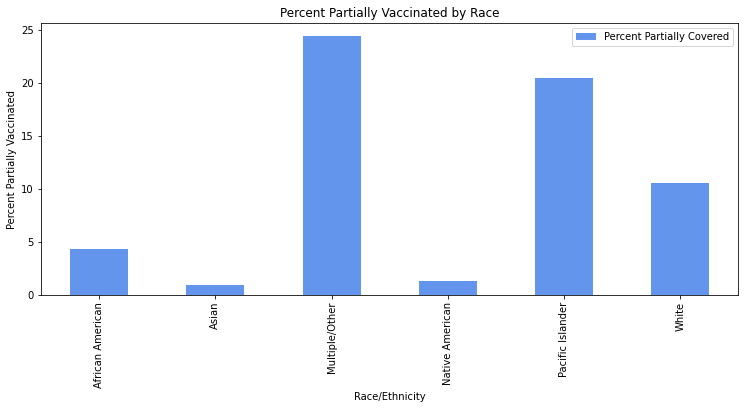

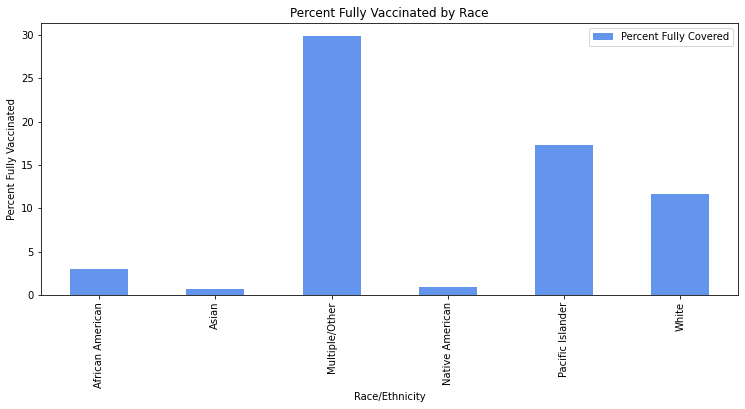

In [ ]:
#Reading in vaccinations by race for all of PA
pa_racedata_statewide = pd.read_csv('https://raw.githubusercontent.com/desmondg19/CLPSProject2/main/COVID-19_Vaccinations_by_Race_Current_Statewide_Health%20(1).csv')

#importing racial breakdown of PA State
pa_population_2010 = 12702379
pa_racebreakdown = pd.read_html('https://en.wikipedia.org/wiki/Pennsylvania', match = 'Pennsylvania Racial Breakdown of Population')[0]
#source for PI and Hawaiian population used below: https://www.census.gov/quickfacts/fact/map/philadelphiacountypennsylvania,PA/RHI525219#qf-headnote-a

#Cleaning the data - changing column names, converting to float, making races match up between data sets
pa_racebreakdown.rename(columns={'2010[83]': '2010'}, inplace=True)
pa_racebreakdown.rename(columns={'Racial composition': 'Race'}, inplace=True)
pa_racebreakdown['2010'] = pa_racebreakdown['2010'].str.replace('%', '').str.replace('–', '0.1')
pa_racebreakdown['2010'] = pa_racebreakdown['2010'].astype(float)
pa_racebreakdown['Race'] = pa_racebreakdown['Race'].str.replace('Black', 'African American')
pa_racebreakdown['Race'] = pa_racebreakdown['Race'].str.replace('Native Hawaiian andother Pacific Islander', 'Pacific Islander')
pa_racebreakdown['Race'] = pa_racebreakdown['Race'].str.replace('Native','Native American')

#Combining the multiple and other rows to be consistent with COVID race data
multiple_otherrow = {'Race': 'Multiple/Other', '1990[81]': 1.0, '2000[82]': 2.7, '2010': 2.4+1.9}
pa_racebreakdown = pa_racebreakdown.append(multiple_otherrow, ignore_index = True)
pa_racebreakdown = pa_racebreakdown.drop(5,axis=0)
pa_racebreakdown = pa_racebreakdown.drop(6,axis=0)

#Merging the two datasets
pa_racebreakdown.reset_index(drop=True, inplace=True)
pa_racedata_statewide.reset_index(drop=True, inplace=True)
pa_racedata_statewide = pd.merge(pa_racedata_statewide, pa_racebreakdown, on = 'Race')

#Dropping uneeded columns and converting population to number instead of percent
pa_racedata_statewide = pa_racedata_statewide.drop('1990[81]',axis=1).drop('2000[82]', axis=1)
pa_racedata_statewide['2010'] = pa_racedata_statewide['2010'] * pa_population_2010/100

#Adding new columns with percent vaccinated by race
pa_racedata_statewide['Partially or Fully Covered'] = pa_racedata_statewide['Partially Covered'] + pa_racedata_statewide['Fully Covered']
pa_racedata_statewide['Percent Partially Covered'] = pa_racedata_statewide['Partially Covered']/pa_racedata_statewide['2010'] * 100
pa_racedata_statewide['Percent Fully Covered'] = pa_racedata_statewide['Fully Covered']/pa_racedata_statewide['2010'] * 100
pa_racedata_statewide['Percent Partially or Fully Covered'] = pa_racedata_statewide['Partially or Fully Covered']/pa_racedata_statewide['2010'] * 100

#Generating Bar Charts by Race
partorfully_byrace_pa = pa_racedata_statewide.plot(x = 'Race', y = "Percent Partially or Fully Covered",
                        kind = 'bar', fontsize = 10, figsize = (12.5, 5), color = 'cornflowerblue',
                        xlabel = 'Race/Ethnicity', ylabel = 'Percent Partially or Fully Vaccinated', 
                        title = 'Percent Partially or Fully Vaccinated by Race')
part_byrace_pa = pa_racedata_statewide.plot(x = 'Race', y = "Percent Partially Covered",
                        kind = 'bar', fontsize = 10, figsize = (12.5, 5), color = 'cornflowerblue',
                        xlabel = 'Race/Ethnicity', ylabel = 'Percent Partially Vaccinated', 
                        title = 'Percent Partially Vaccinated by Race')
full_byrace_pa = pa_racedata_statewide.plot(x = 'Race', y = "Percent Fully Covered",
                                            kind = 'bar', fontsize = 10, figsize = (12.5, 5), color = 'cornflowerblue',
                                            xlabel = 'Race/Ethnicity', ylabel = 'Percent Fully Vaccinated', 
                                            title = 'Percent Fully Vaccinated by Race')

From the data above, we can start to see a pattern emerge. Regardless of whether we're looking at partial and full, just partial, or just full, the rates of vaccination are highest among the Multiple/Other category and second-highest among Pacific Islanders. However, given the very small fraction those groups make up as a percentage of the overall population, it is hard to reliably make conclusions about those groups. 

Additionally, we can see that white residents of PA are getting vaccinated at a higher rate than African American or Asian residents. 

One issue of note - all COVID vaccination databases lumped "Hispanic" as a race. In contrast, however, the population-wide census data considered Hispanic as an ethnicity, and thus, it was not possible to add a bar corresponding to Hispanic vaccinations at this stage of the analysis.

Now, we wanted to look at the racial breakdown of vaccination levels at the county by county level. The rest of the data in this section of the project is based on county-by-county vaccination levels. This next cell is all the data processing required and the comments break down what we were doing at each step. Afterward, we generated more choropleths that are explained below. 

We chose to analyze white vs non-white vaccinations only. First, the reason for this is the quality of the information about each racial group varied and there were a lot of spots where the number of vaccinations was zero. Second, it was challenging to find a dataset that had race/ethnicity data defined the same way that the COVID data did, since Hispanic was considered an ethnicity. We were, in contrast, able to find data about Non-Hispanic Whites vs other races/ethnicities, which allowed us to account for the vaccination rates of Hispanic residents. 

In [ ]:
#Filling all the blank spots with zero
pa_racedata.fillna(0, inplace = True)

#Made two new columns with sums of vaccinations for all non-white populations in PA and all people
pa_racedata['Partially Covered Non-White'] = pa_racedata['Partially Covered African American'] + pa_racedata['Partially Covered Asian'] + pa_racedata['Partially Covered Native American'] + pa_racedata['Partially Covered Pacific Islander'] 
pa_racedata['Partially Covered'] = pa_racedata['Partially Covered Non-White'] + pa_racedata['Partially Covered Unknown'] + pa_racedata['Partially Covered White'] + pa_racedata['Partially Covered Multiple Other']
pa_racedata['Fully Covered Non-White'] = pa_racedata['Fully Covered African American'] + pa_racedata['Fully Covered Asian'] + pa_racedata['Fully Covered Native American'] + pa_racedata['Fully Covered Pacific Islander']
pa_racedata['Fully Covered'] = pa_racedata['Fully Covered Non-White'] + pa_racedata['Fully Covered Unknown'] + pa_racedata['Fully Covered White'] + pa_racedata['Fully Covered Multiple Other']
pa_racedata['Partially or Fully Covered'] = pa_racedata['Fully Covered'] + pa_racedata['Partially Covered']

#Filtered the county info table to PA only and changed the value of county column so it matched racedata
pa_countyinfo['CTYNAME'] = pa_countyinfo['CTYNAME'].str.replace(' County','', regex=True)

#Dropped the row that had data about out of state vaccinations
pa_race_instate = pa_racedata.drop(67,axis=0)

#Renamed the county name columns to be the same in the two df's so I could merge them
pa_countyinfo.rename(columns={'CTYNAME': 'County Name'}, inplace=True)
print(pa_countyinfo.columns.values[2] == 'County Name')

#Merging the Data
pa_countyinfo.reset_index(drop=True, inplace=True)
pa_race_instate.reset_index(drop=True, inplace=True)
pa_race_covid = pd.merge(pa_race_instate, pa_countyinfo, on = 'County Name')

#Calculating the Percent of White/Non-White People Vaccinated and Generating New Columns
pa_race_covid['Percent Partially Covered Non-White'] = pa_race_covid['Partially Covered Non-White']/pa_race_covid['Not_NHWhite_Alone'] * 100
pa_race_covid['Percent Fully Covered Non-White'] = pa_race_covid['Fully Covered Non-White']/pa_race_covid['Not_NHWhite_Alone'] * 100
pa_race_covid['Percent Covered Non-White'] = pa_race_covid['Percent Partially Covered Non-White'] + pa_race_covid['Percent Fully Covered Non-White']

pa_race_covid['Percent Partially Covered White'] = pa_race_covid['Partially Covered White']/pa_race_covid['NHWhite_Alone'] * 100
pa_race_covid['Percent Fully Covered White'] = pa_race_covid['Fully Covered White']/pa_race_covid['NHWhite_Alone'] * 100
pa_race_covid['Percent Covered White'] = pa_race_covid['Percent Partially Covered White'] + pa_race_covid['Percent Fully Covered White']

pa_race_covid['Percent Partially Covered'] = pa_race_covid['Partially Covered']/pa_race_covid['TOT_POP'] * 100
pa_race_covid['Percent Fully Covered'] = pa_race_covid['Fully Covered']/pa_race_covid['TOT_POP'] * 100
pa_race_covid['Percent Partially or Fully Covered'] = pa_race_covid['Partially or Fully Covered']/pa_race_covid['TOT_POP'] * 100

True


Now, we generated 6 different choropleth maps. These choropleth maps show data on a county-by-county basis, rather than the state-by-state graphs that we saw before. 

The first set of graphs shows the rates of partial vaccination by county, first for non-white residents than for white residents, and then for all residents (as there were a significant fraction of counties where most people fell into the unknown race category).

The second set of graphs show rates of full vaccination by county, first for non-white residents followed by for white residents, and then for all residents.

In [ ]:
#Vaccination Choropleth Graphs - non-white, white, and all partial/full vaccination
partvac_NW = pa_race_covid['Percent Partially Covered Non-White'].tolist()
fullvac_NW = pa_race_covid['Percent Fully Covered Non-White'].tolist()
partvac_W = pa_race_covid['Percent Partially Covered White'].tolist()
fullvac_W = pa_race_covid['Percent Fully Covered White'].tolist()
partvac = pa_race_covid['Percent Partially Covered'].tolist()
fullvac = pa_race_covid['Percent Fully Covered'].tolist()

pa_fips = pa_race_covid['FIPS'].tolist()

vaccine_endpts = list(np.mgrid[min(fullvac_NW):max(partvac):5j])

partvac_NW_fig = ff.create_choropleth(pa_fips, partvac_NW, scope=['Pennsylvania'], show_state_data=True, 
                           binning_endpoints=vaccine_endpts,
                           plot_bgcolor='rgb(229,229,229)',
                           simplify_county = 0, simplify_state = 0,
                           show_hover = True, title = 'Non-White Partial Vaccination by County',
                           paper_bgcolor='rgb(229,229,229)',
                           legend_title='Non-White Partial Vaccination Percentage',
                           county_outline={'color': 'rgb(255,255,255)', 'width': 0.2})
fullvac_NW_fig = ff.create_choropleth(pa_fips, fullvac_NW, scope=['Pennsylvania'], show_state_data=True, 
                           binning_endpoints=vaccine_endpts, 
                           plot_bgcolor='rgb(229,229,229)', simplify_county = 0, simplify_state = 0,
                           show_hover = True, title = 'Non-White Full Vaccination Percentage',
                           paper_bgcolor='rgb(229,229,229)', 
                           legend_title='Non-White Full Vaccination by County',
                           county_outline={'color': 'rgb(255,255,255)', 'width': 0.2})
partvac_W_fig = ff.create_choropleth(pa_fips, partvac_W, scope=['Pennsylvania'], show_state_data=True, 
                           binning_endpoints=vaccine_endpts,
                           plot_bgcolor='rgb(229,229,229)', simplify_county = 0, simplify_state = 0,
                           show_hover = True, title = 'White Partial Vaccination by County',
                           paper_bgcolor='rgb(229,229,229)',
                           legend_title='White Partial Vaccination Percentage',
                           county_outline={'color': 'rgb(255,255,255)', 'width': 0.2})
fullvac_W_fig = ff.create_choropleth(pa_fips, fullvac_W, scope=['Pennsylvania'], show_state_data=True, 
                           binning_endpoints=vaccine_endpts, simplify_county = 0, simplify_state = 0,
                           show_hover = True, title = 'White Full Vaccination by County',
                           plot_bgcolor='rgb(229,229,229)',
                           paper_bgcolor='rgb(229,229,229)',
                           legend_title='White Full Vaccination Percentage',
                           county_outline={'color': 'rgb(255,255,255)', 'width': 0.2})
partvac_fig = ff.create_choropleth(pa_fips, partvac, scope=['Pennsylvania'], show_state_data=True, 
                           binning_endpoints=vaccine_endpts, 
                           plot_bgcolor='rgb(229,229,229)',
                           simplify_county = 0, simplify_state = 0,
                           show_hover = True, title = 'Partial Vaccination by County',
                           paper_bgcolor='rgb(229,229,229)', 
                           legend_title='Partial Vaccination Percentage',
                           county_outline={'color': 'rgb(255,255,255)', 'width': 0.2})
fullvac_fig = ff.create_choropleth(pa_fips, fullvac, scope=['Pennsylvania'], show_state_data=True, 
                           binning_endpoints=vaccine_endpts, 
                           plot_bgcolor='rgb(229,229,229)',
                           simplify_county = 0, simplify_state = 0,
                           show_hover = True, title = 'Full Vaccination by County',
                           paper_bgcolor='rgb(229,229,229)',
                           legend_title='Full Vaccination Percentage',
                           county_outline={'color': 'rgb(255,255,255)', 'width': 0.2})

#Set 1 of Graphs as explained above
partvac_NW_fig.show()
partvac_W_fig.show()
partvac_fig.show()

#Set 2 of Graphs as explained above
fullvac_NW_fig.show()
fullvac_W_fig.show()
fullvac_fig.show()

Pretty quickly, just based on the colors of each map, we can see a clear difference between the white and non-white vaccination percentages and the non-white and overall vaccination percentages (there is a much smaller visual difference between the white and overall vaccination percentages). This holds for both partial and full vaccination data. 

At this point, since we didn't see a clear difference in the patterns for partial and full vaccination rates, our analysis shifted to focusing on the combined partial and full vaccination rates for the remainder of the analysis by race. 

We wanted to look at this data more quantitatively, so we generated a few additional types of figures below. The first is a stacked barplot by county so we can see the percent vaccinated by county and the racial breakdown for each county. The second figure is a grouped barplot showing the percent covered by race per county, with the white and non-white bars grouped next to each other. The last set of graphs show histograms showing the frequencies of various ranges of percent vaccinated by race (one graph for white residents and one for non-white residents).

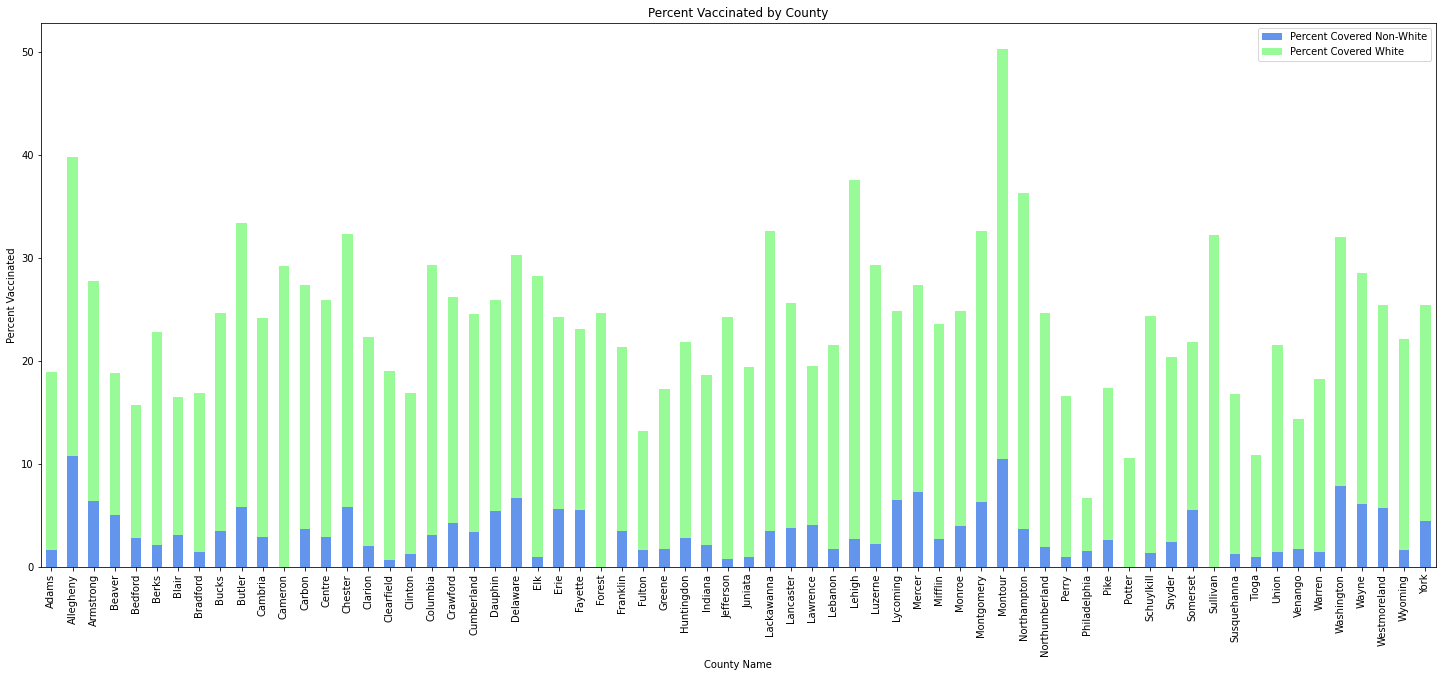

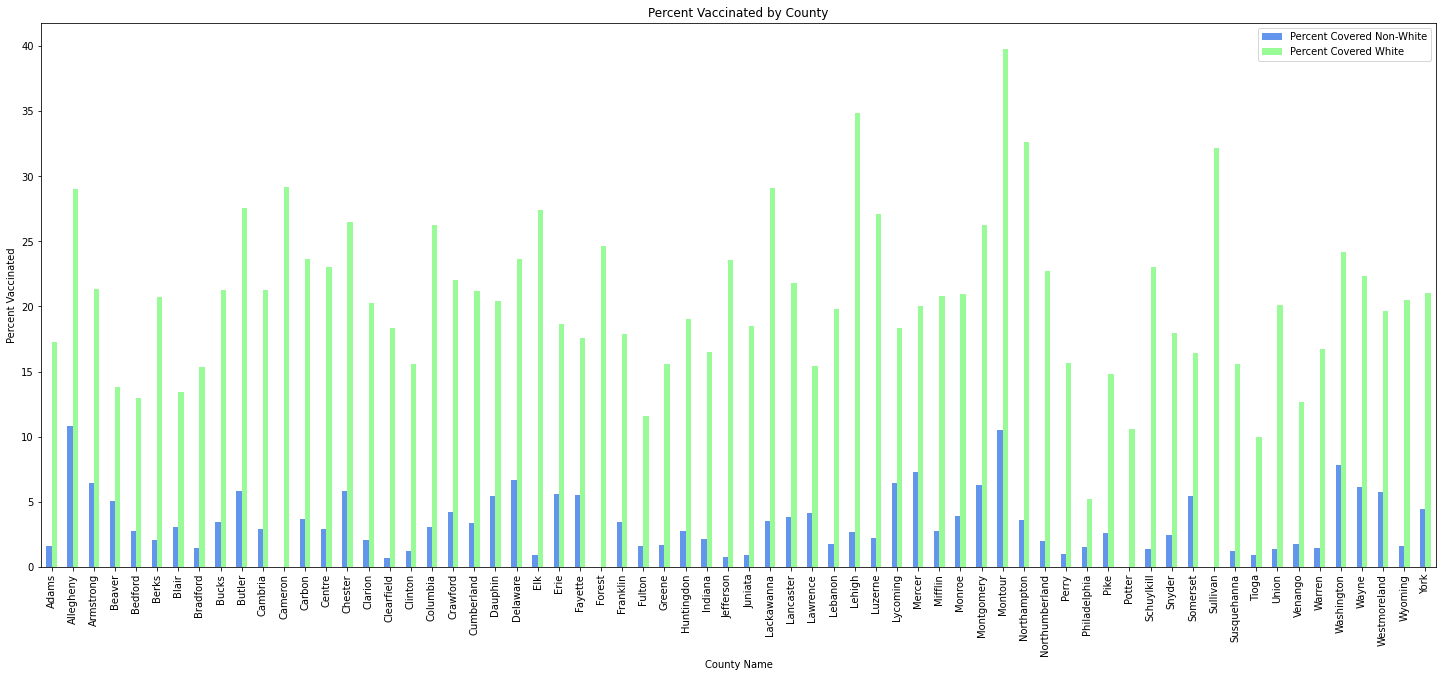

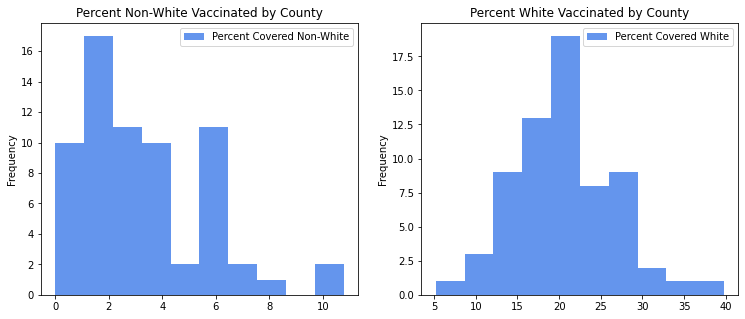

In [ ]:
#Vaccination Rates Stacked Barplot by County
pa_race_covid.plot(x = 'County Name', y = ["Percent Covered Non-White", 
                                                "Percent Covered White"], 
                   kind = 'bar', stacked = True, fontsize = 10, figsize = (25, 10),
                   xlabel = 'County Name', ylabel = 'Percent Vaccinated',
                   title = 'Percent Vaccinated by County',
                   color = ['cornflowerblue', 'palegreen'])

#Vaccination Rates Grouped Barplot by County
pa_race_covid.plot(x = 'County Name', y = ["Percent Covered Non-White",
                                           "Percent Covered White"], 
                   kind = 'bar', fontsize = 10, figsize = (25, 10),
                   xlabel = 'County Name', ylabel = 'Percent Vaccinated',
                   title = 'Percent Vaccinated by County', 
                   color = ['cornflowerblue', 'palegreen'])

#Vaccination Histograms - White vs Non-White Vaccination Rates
fig, axes = plt.subplots(nrows=1, ncols = 2)

pa_race_covid.plot(x = 'County Name', y = "Percent Covered Non-White",
                   kind = 'hist', xlabel = 'Percent Covered Non-White',
                   ylabel = 'Frequency', color = 'cornflowerblue',
                   title = 'Percent Non-White Vaccinated by County', 
                   ax = axes[0], figsize = (12.5, 5))
pa_race_covid.plot(x = 'County Name', y = "Percent Covered White",
                   kind = 'hist', xlabel = 'Percent Covered White',
                   ylabel = 'Frequency', color = 'cornflowerblue',
                   title = 'Percent White Vaccinated by County',
                   ax = axes[1], figsize = (12.5, 5))

From the first two graphs, we can see that every county has more white residents vaccinated as a percentage of the white population in the county than non-white residents. This is consistent with our data studying the US as a whole, PA specifically, and from the choropleth maps that we saw above. 

From the two histograms, we can see that there is a visual difference in the peak, representing the most common interval by percent of each group (white vs non-white that is vaccinated). It's also worth noting that the scale is different! The peak for non-white residents is about 1-2 percent, while for white residents, it is closer to the range of 17.5-22.5%. Thus, there is a clear difference in the rates of vaccination by race. 

In [ ]:
white = pa_race_covid['Percent Covered White'].to_numpy(dtype=np.float32)
nonwhite = pa_race_covid['Percent Covered Non-White'].to_numpy(dtype=np.float32)
white_part = pa_race_covid['Percent Partially Covered White'].to_numpy(dtype=np.float32)
nonwhite_part = pa_race_covid['Percent Partially Covered Non-White'].to_numpy(dtype=np.float32)
white_full = pa_race_covid['Percent Fully Covered White'].to_numpy(dtype=np.float32)
nonwhite_full = pa_race_covid['Percent Fully Covered Non-White'].to_numpy(dtype=np.float32)

test_all, p_all = scipy.stats.mannwhitneyu(white, nonwhite, alternative='two-sided')
print('First, we compared the vaccination rates between white and non-whites regardless or partial/full vaccination')
print('Test statistic = {:5.3f} and probability p = {:5.3f}'.format(test_all, p_all)) 

test_part, p_part = scipy.stats.mannwhitneyu(white_part, nonwhite_part, alternative='two-sided')
print('Next, we compared the vaccination rates between white and non-whites for partial vaccination')
print('Test statistic = {:5.3f} and probability p = {:5.3f}'.format(test_part, p_part)) 

test_full, p_full = scipy.stats.mannwhitneyu(white_full, nonwhite_full, alternative='two-sided')
print('Finally, we compared the vaccination rates between white and non-whites for full vaccination')
print('Test statistic = {:5.3f} and probability p = {:5.3f}'.format(test_full, p_full)) 

First, we compared the vaccination rates between white and non-whites regardless or partial/full vaccination
Test statistic = 4337.000 and probability p = 0.000
Next, we compared the vaccination rates between white and non-whites for partial vaccination
Test statistic = 4307.000 and probability p = 0.000
Finally, we compared the vaccination rates between white and non-whites for full vaccination
Test statistic = 4337.000 and probability p = 0.000


We did a series of Mann-Whitney U tests since our data (percents vaccinated) were not normal. As a result, we couldn't use a t-test as we might otherwise have used. The null hypothesis for these is that for randomly selected values X and Y from two populations, the probability of X being greater than Y is equal to the probability of Y being greater than X. The alternative hypothesis is that one distribution is stochastically different than the other. The p-values are smaller than alpha (p < 0.01), so we can reject the null hypothesis and conclude that there is a difference in the rates of vaccination for white vs non-white residents of PA, irrespective of if we consider partial, full, or both states of vaccination. 

Overall conclusions based on the various types of graphs we did and the Mann–Whitney U test suggest that there is a statistically significant difference in the rates of vaccination between white and non-white populations. 

This analysis could be improved if we had better data breaking down vaccinations by race/ethnicity if ethnicity was considered separately from race, and if the number of unknowns was a smaller percentage of total vaccinations by county. However, from the data analysis above, there does seem to be a difference in vaccination rates by white vs non-white residents of PA. 

Now, we wanted to move on to studying how other variables at the county level influenced vaccination rates. First, we studied how income was correlated with vaccination rates (partial, full, and both rates. The graphs we generated are explained below. 

First, lets study how income is related to the rates of partial vaccination. Below, you will see a scatter plot for these variables as well as a linear regression.
The linear model is: Y = 1.2356 + 0.00018182X


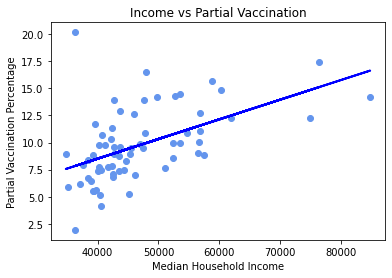

                                OLS Regression Results                               
Dep. Variable:     Percent Partially Covered   R-squared:                       0.271
Model:                                   OLS   Adj. R-squared:                  0.260
Method:                        Least Squares   F-statistic:                     23.79
Date:                       Tue, 20 Apr 2021   Prob (F-statistic):           7.45e-06
Time:                               02:07:44   Log-Likelihood:                -163.42
No. Observations:                         66   AIC:                             330.8
Df Residuals:                             64   BIC:                             335.2
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------

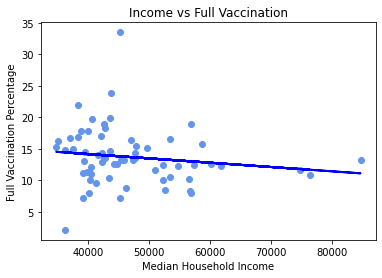

                              OLS Regression Results                             
Dep. Variable:     Percent Fully Covered   R-squared:                       0.022
Model:                               OLS   Adj. R-squared:                  0.007
Method:                    Least Squares   F-statistic:                     1.426
Date:                   Tue, 20 Apr 2021   Prob (F-statistic):              0.237
Time:                           02:07:44   Log-Likelihood:                -191.61
No. Observations:                     66   AIC:                             387.2
Df Residuals:                         64   BIC:                             391.6
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


In [ ]:
x#Adding income related data from an HTML table
pa_tables = pd.read_html('https://en.wikipedia.org/wiki/List_of_Pennsylvania_counties_by_per_capita_income')
pa_income = pa_tables[1]
pa_income.rename(columns={'County': 'County Name'}, inplace=True)

#Merging data with COVID data by county
pa_income.reset_index(drop=True, inplace=True)
pa_race_covid.reset_index(drop=True, inplace=True)
pa_income_covid = pd.merge(pa_race_covid, pa_income, on = 'County Name')
pa_income_covid['Medianhouseholdincome'] = pa_income_covid['Medianhouseholdincome'].str.replace('$', '').str.replace(',', '')
pa_income_covid['Medianhouseholdincome'] = pa_income_covid['Medianhouseholdincome'].astype(int)

#Income Choropleth
incomes = pa_income_covid['Medianhouseholdincome'].tolist()
income_endpts = list(np.mgrid[min(incomes):max(incomes):5j])
incomes_fig = ff.create_choropleth(pa_fips, incomes, scope=['Pennsylvania'], show_state_data=True, 
                           binning_endpoints=income_endpts,
                           simplify_county = 0, simplify_state = 0,
                           show_hover = True, title = 'Median Household Income by County',
                           legend_title='Median Household Income ($)',
                           county_outline={'color': 'rgb(255,255,255)', 'width': 0.2})
partvac_fig.show()
fullvac_fig.show()
incomes_fig.show()

#Income scatterplots - Partial Vaccination
print("First, lets study how income is related to the rates of partial vaccination. "
"Below, you will see a scatter plot for these variables as well as a linear regression.")
X_part_income = pa_income_covid['Medianhouseholdincome']
Y_part_income = pa_income_covid['Percent Partially Covered']

fig = plt.scatter(X_part_income, Y_part_income, color = 'cornflowerblue')

y_index_part_income = pa_income_covid.columns.get_loc("Percent Partially Covered")
x_index_part_income = pa_income_covid.columns.get_loc("Medianhouseholdincome")
Y_income_part = pa_income_covid.iloc[:, y_index_part_income].values.reshape(-1, 1)
X_income_part = pa_income_covid.iloc[:, x_index_part_income].values.reshape(-1, 1)
reg = LinearRegression()
reg.fit(X_income_part, Y_income_part)
predictions = reg.predict(X_income_part)
plt.plot(X_part_income, predictions, c='blue', linewidth=2)

print("The linear model is: Y = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))

plt.xlabel('Median Household Income')
plt.ylabel('Partial Vaccination Percentage')
plt.title('Income vs Partial Vaccination')
plt.show()

X1 = sm.add_constant(X_part_income)
est = sm.OLS(Y_part_income, X1)
est2 = est.fit()
print(est2.summary())

#Income scatterplots - Full Vaccination
print("Now, lets study the relationship between Median Household Income and Full Vaccination. "
"Below, you will see a scatter plot for these variables as well as a linear regression.")
X_full_income = pa_income_covid['Medianhouseholdincome']
Y_full_income = pa_income_covid['Percent Fully Covered']

plt.scatter(X_full_income, Y_full_income, color = 'cornflowerblue')

y_index_full_income = pa_income_covid.columns.get_loc("Percent Fully Covered")
x_index_full_income = pa_income_covid.columns.get_loc("Medianhouseholdincome")
Y_income_full = pa_income_covid.iloc[:, y_index_full_income].values.reshape(-1, 1)
X_income_full = pa_income_covid.iloc[:, x_index_full_income].values.reshape(-1, 1)
reg = LinearRegression()
reg.fit(X_income_full, Y_income_full)
predictions = reg.predict(X_income_full)
plt.plot(X_full_income, predictions, c='blue', linewidth=2)

print("The linear model is: Y = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))

plt.xlabel('Median Household Income')
plt.ylabel('Full Vaccination Percentage')
plt.title('Income vs Full Vaccination')
plt.show()

X2 = sm.add_constant(X_full_income)
est = sm.OLS(Y_full_income, X2)
est2 = est.fit()
print(est2.summary())

The first graph is the same choropleth we saw above for the partial vaccination rates in the whole county, and the second graph is for the full vaccination rates in the whole county. The third graph represents the Median Household income for each county. In contrast to the data from before, it is much more challenging to visually see a relationship between income and vaccination. 

Next, we generated a scatter plot, where the x axis is the percent partially covered on the left and the percent fully covered on the right. On both graphs, the y-axis is the median household income. First, for the partial vaccination scenario, the p-value is 7.45e-06 (less than alpha = 0.01), so we can conclude there is a relationship between median income and partial vaccination. In contrast, for the complete vaccination, the p-value is 0.237 (> alpha = 0.01), so we fail to reject the null hypothesis that the correlation coefficient is zero. 

We can think of a few potential explanations of this. First, people fully vaccinated by the time we started this anlysis (early April) are the healthcare workers and other high-risk occupations as well as the elderly. Many high-risk occuptations/frontline worker positions do not have high salaries, although some certainly do. Because of that, there might not be as clear of a trend. Second, the elderly on average have lower median household incomes, and as a consequence, the higher proportion of the elderly that were vaccinated early might result in the lack of a relationship between the percent covered and median household income. 

Next, we wanted to see how vaccination rates were related to the percentage of the county that voted for Trump. The graphs are explained below. 

First, lets study how political affiliation is related to the rates of partial vaccination. Below, you will see a scatter plot for these variables as well as a linear regression.
The linear model is: Y = 15.245 + -0.086744X


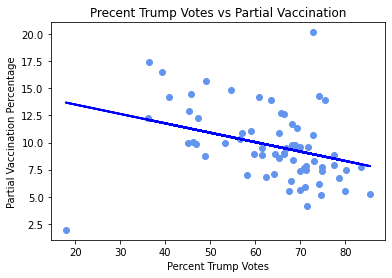

                                OLS Regression Results                               
Dep. Variable:     Percent Partially Covered   R-squared:                       0.111
Model:                                   OLS   Adj. R-squared:                  0.097
Method:                        Least Squares   F-statistic:                     7.977
Date:                       Tue, 20 Apr 2021   Prob (F-statistic):            0.00631
Time:                               02:07:48   Log-Likelihood:                -169.98
No. Observations:                         66   AIC:                             344.0
Df Residuals:                             64   BIC:                             348.3
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------

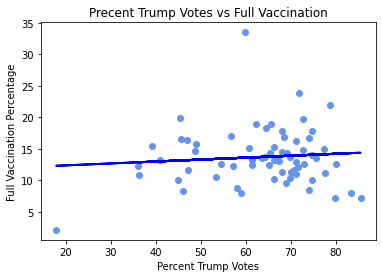

                              OLS Regression Results                             
Dep. Variable:     Percent Fully Covered   R-squared:                       0.008
Model:                               OLS   Adj. R-squared:                 -0.008
Method:                    Least Squares   F-statistic:                    0.5096
Date:                   Tue, 20 Apr 2021   Prob (F-statistic):              0.478
Time:                           02:07:48   Log-Likelihood:                -192.08
No. Observations:                     66   AIC:                             388.2
Df Residuals:                         64   BIC:                             392.5
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

In [ ]:
#Adding Election Related data from HTML table
pa_elections = pd.read_html('https://en.wikipedia.org/wiki/2020_United_States_presidential_election_in_Pennsylvania')
pa_pres_elections = pa_elections[32]

#Table was a two layered column header, so I had to compress to one level column before merging
pa_pres_elections.columns = pa_pres_elections.columns.map(lambda x: '|'.join([str(i) for i in x]))
pa_pres_elections.reset_index(drop=True, inplace=True)
pa_income_covid.reset_index(drop=True, inplace=True)
pa_elections_covid = pd.merge(pa_income_covid, pa_pres_elections, left_on='County Name', right_on = pa_pres_elections['County|County'])
pa_elections_covid = pa_elections_covid.drop('County|County',axis=1)
pa_elections_covid['Donald Trump Republican|%'] = pa_elections_covid['Donald Trump Republican|%'].str.replace('%', '')
pa_elections_covid['Donald Trump Republican|%'] = pa_elections_covid['Donald Trump Republican|%'].astype(float)

#Elections Choropleth
elections = pa_elections_covid['Donald Trump Republican|%'].tolist()
elections_endpts = list(np.mgrid[min(elections):max(elections):5j])
elections_fig = ff.create_choropleth(pa_fips, elections, scope=['Pennsylvania'], show_state_data=True, 
                           binning_endpoints=elections_endpts,
                           simplify_county = 0, simplify_state = 0,
                           show_hover = True, title = 'Percent Trump Votes by County',
                           legend_title='Percent Trump Votes',
                           county_outline={'color': 'rgb(255,255,255)', 'width': 0.2})
partvac_fig.show()
fullvac_fig.show()
elections_fig.show()

#Elections scatterplots - Partial Vaccination
print("First, lets study how political affiliation is related to the rates of partial vaccination. "
"Below, you will see a scatter plot for these variables as well as a linear regression.")
X_part_election = pa_elections_covid['Donald Trump Republican|%']
Y_part_election = pa_elections_covid['Percent Partially Covered']

fig = plt.scatter(X_part_election, Y_part_election, color = 'cornflowerblue')

y_index_part_election = pa_elections_covid.columns.get_loc("Percent Partially Covered")
x_index_part_election = pa_elections_covid.columns.get_loc("Donald Trump Republican|%")
Y_election_part = pa_elections_covid.iloc[:, y_index_part_election].values.reshape(-1, 1)
X_election_part = pa_elections_covid.iloc[:, x_index_part_election].values.reshape(-1, 1)
reg = LinearRegression()
reg.fit(X_election_part, Y_election_part)
predictions = reg.predict(X_election_part)
plt.plot(X_part_election, predictions, c='blue', linewidth=2)

print("The linear model is: Y = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))

plt.xlabel('Percent Trump Votes')
plt.ylabel('Partial Vaccination Percentage')
plt.title('Precent Trump Votes vs Partial Vaccination')
plt.show()

X3 = sm.add_constant(X_part_election)
est = sm.OLS(Y_part_election, X3)
est2 = est.fit()
print(est2.summary())

#Elections scatterplots - Full Vaccination
print("Now, lets study the relationship between Political Affilitation and Full Vaccination. "
"Below, you will see a scatter plot for these variables as well as a linear regression.")
X_full_election = pa_elections_covid['Donald Trump Republican|%']
Y_full_election = pa_elections_covid['Percent Fully Covered']

plt.scatter(X_full_election, Y_full_election, color = 'cornflowerblue')

y_index_full_election = pa_elections_covid.columns.get_loc("Percent Fully Covered")
x_index_full_election = pa_elections_covid.columns.get_loc("Donald Trump Republican|%")
Y_election_full = pa_elections_covid.iloc[:, y_index_full_election].values.reshape(-1, 1)
X_election_full = pa_elections_covid.iloc[:, x_index_full_election].values.reshape(-1, 1)
reg = LinearRegression()
reg.fit(X_election_full, Y_election_full)
predictions = reg.predict(X_election_full)
plt.plot(X_full_election, predictions, c='blue', linewidth=2)

print("The linear model is: Y = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))

plt.xlabel('Percent Trump Votes')
plt.ylabel('Full Vaccination Percentage')
plt.title('Precent Trump Votes vs Full Vaccination')
plt.show()

X4 = sm.add_constant(X_full_election)
est = sm.OLS(Y_full_election, X4)
est2 = est.fit()
print(est2.summary())

The first graph is the same choropleth we saw above for the partial vaccination rates in the whole county, and the second graph is for the full vaccination rates in the whole county. The third graph represents the percent of Trump Votes. In contrast to the race data from before, it is much more challenging to visually see a relationship between income and vaccination. However, there is a clear similarity in the patterns of coloration for the percent Trump votes and the partial vaccinations, while a relationship is less clear for full vaccinations by county. 

Next, we generated a scatter plot, where the x axis is the percent partially covered on the left and the percent fully covered on the right. On both graphs, the y-axis is the percent of Trump votes. First, for the partial vaccination scenario, the p-value is 0.00631(less than alpha = 0.01), so we can conclude there is a relationship between percent Trump votes and partial vaccination. In contrast, for the complete vaccination, the p-value is 0.478 (> alpha = 0.01), so we fail to reject the null hypothesis that the correlation coefficient is zero. 

We think that the explanation for this might be similar to the full vaccination rates. The elderly voted for Trump at higher rates in PA, and they might have been more likely be fully vaccinated because they were at higher risks of complciations. Because of that, there might not be as clear of a relationship between the percent covered and percent Trump votes. 